In [ ]:
## IMport libraries
import warnings
warnings.filterwarnings("ignore")
import os, cv2, random
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import ticker
import seaborn as sns
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops, local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import zipfile
import io

Populating the interactive namespace from numpy and matplotlib


In [ ]:
## import male zip file
male_zip_path = '/content/male1.zip'
## import female zipfile
female_zip_path = '/content/female1.zip'

In [ ]:
## Process images inside the zip file to extract them and make them ready for further process

In [ ]:
# Function to process images from a zip file
def process_images_from_zip(zip_path):
    with zipfile.ZipFile(zip_path) as zip_file:
        image_files = [file for file in zip_file.namelist() if file.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        extracted_images = []
        for image_file in image_files:
            with zip_file.open(image_file) as file:
                img_data = file.read()
                img_np_array = np.frombuffer(img_data, np.uint8)
                img_cv2 = cv2.imdecode(img_np_array, -1)
                if img_cv2 is not None:
                    extracted_images.append(img_cv2)
    return extracted_images

In [ ]:
## Resizing the images to a universal size of 32, 32 for all images for further processes

In [ ]:
# Function to resize images for pre processing
def resize_images(images):
    resized = []
    for img in images:
        if isinstance(img, np.ndarray):
            resized_img = cv2.resize(img, (32, 32))
            resized.append(resized_img)
        else:
            print("Image not a valid numpy array:", img)
    return resized

In [ ]:
## Apply all the resize function
male_re= resize_images(process_images_from_zip(male_zip_path))
female_re=resize_images(process_images_from_zip(female_zip_path))


In [ ]:
# Check the first few images to see if they're valid numpy arrays
print("Resized males:", len(male_re))
print("Resized females:", len(female_re))

Resized males: 1502
Resized females: 1500


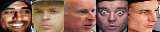

In [ ]:
# Printing the first five images of the male zip file for the sample
# Select the first 5 images
selected_images = male_re[:5]

# Concatenate the first 5 images horizontally
male_sample = selected_images[0]
for i in range(1, len(selected_images)):
    male_sample = cv2.hconcat([male_sample, selected_images[i]])

# Display the horizontally concatenated image
cv2_imshow(male_sample)



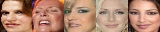

In [ ]:
## Printing the first 5 females of the female zip file

# Select the first 5 images
selected_images = female_re[:5]

# Concatenate the first 5 images horizontally
female_sample = selected_images[0]
for i in range(1, len(selected_images)):
    female_sample = cv2.hconcat([female_sample, selected_images[i]])

# Display the horizontally concatenated image
cv2_imshow(female_sample)

In [ ]:
## Converting the color images to gray scale which makes it easy for Computer Vision process

In [ ]:
## Create two lits to store-converted gray images
gray_male=[]
gray_female=[]

In [ ]:
## Create a function to convert color images to gray
def convert_to_gray(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

In [ ]:
## apply the function to male and female images and append them to respective lists
for i in male_re:
  x=convert_to_gray(i)
  gray_male.append(x)


for i in female_re:
  y=convert_to_gray(i)
  gray_female.append(y)



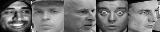

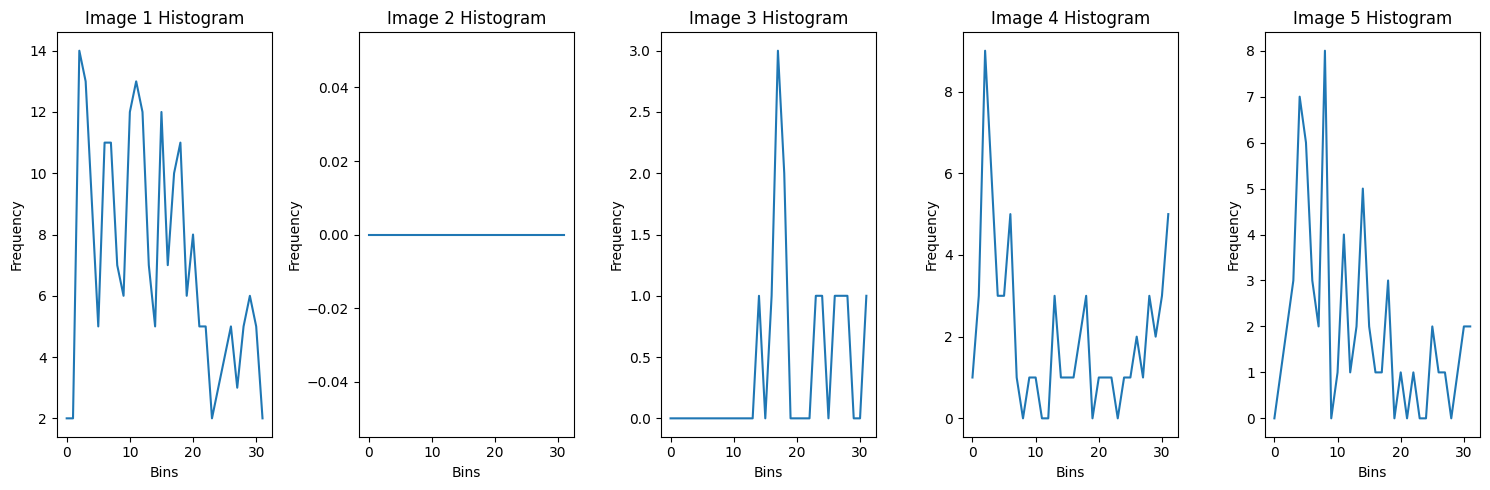

In [ ]:
# Select the first 5 images
selected_images = gray_male[:5]

# Concatenate the first 5 images horizontally
male_sample = selected_images[0]
for i in range(1, len(selected_images)):
    male_sample = cv2.hconcat([male_sample, selected_images[i]])

# Display the horizontally concatenated image
cv2_imshow(male_sample)
# Plot histograms for the selected grayscale male images
plt.figure(figsize=(15, 5))

for i, img in enumerate(selected_images):
    plt.subplot(1, 5, i + 1)
    hist = cv2.calcHist([img], [0], None, [32], [0, 32])
    plt.plot(hist)
    plt.title(f"Image {i+1} Histogram")
    plt.xlabel('Bins')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

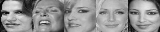

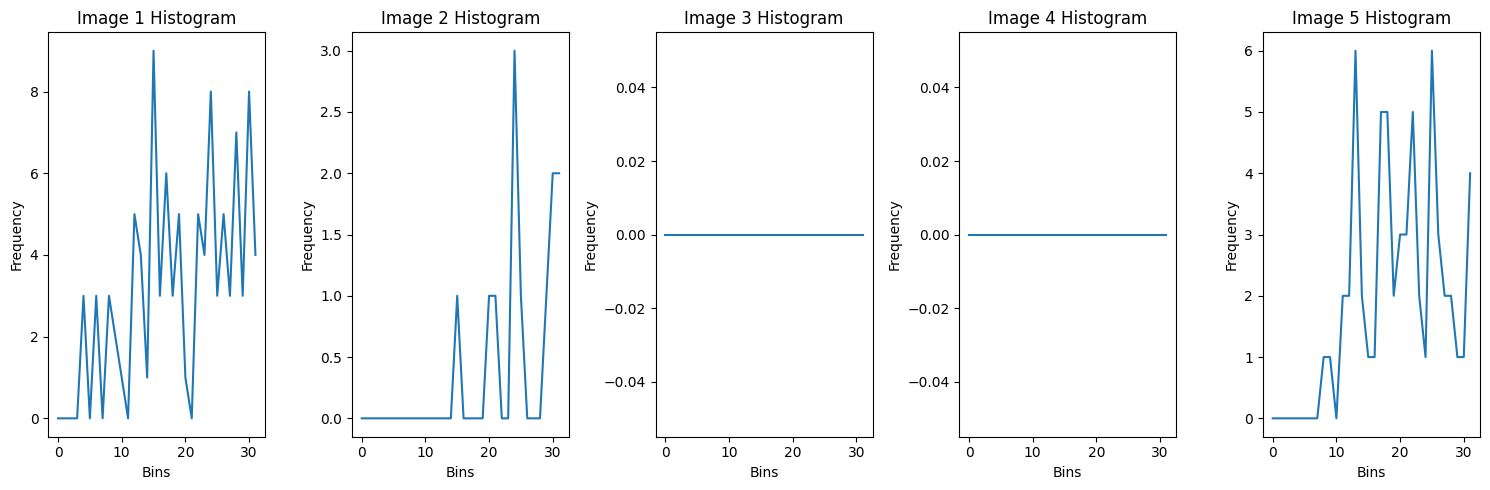

In [ ]:
# Select the first 5 images
selected_images = gray_female[:5]

# Concatenate the first 5 images horizontally
female_sample = selected_images[0]
for i in range(1, len(selected_images)):
    female_sample = cv2.hconcat([female_sample, selected_images[i]])

# Display the horizontally concatenated image
cv2_imshow(female_sample)
# Plot histograms for the selected grayscale male images
plt.figure(figsize=(15, 5))

for i, img in enumerate(selected_images):
    plt.subplot(1, 5, i + 1)
    hist = cv2.calcHist([img], [0], None, [32], [0, 32])
    plt.plot(hist)
    plt.title(f"Image {i+1} Histogram")
    plt.xlabel('Bins')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## **1.Without Prep processing steps like Cleaning filtering the images**

In [ ]:
# Function to extract Local Binary Pattern (LBP) feature
def extract_lbp(image):
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    lbp_hist, _ = np.histogram(lbp, bins=np.arange(0, n_points + 3), density=True)
    return lbp_hist



In [ ]:
# Function to compute LBP features and visualize the effect
def compute_and_visualize_lbp(image):
    # Compute LBP features
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')

    # Print the LBP values (you can comment this line if the output is too lengthy)
    print("LBP Values:")
    print(lbp)

    # Display the original image and LBP visualization
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Input Image')

    ax[1].imshow(lbp, cmap='gray')
    ax[1].set_title('LBP Visualization')
    plt.show()

LBP visualization for Male images:
LBP Values:
[[25.  5. 25. ... 25.  9.  9.]
 [ 7.  8.  9. ... 25.  2.  0.]
 [10. 11. 12. ... 25.  0.  0.]
 ...
 [10.  9. 10. ... 25.  2.  1.]
 [ 8. 24.  8. ... 25.  2.  1.]
 [ 8.  8.  9. ... 25.  2.  1.]]


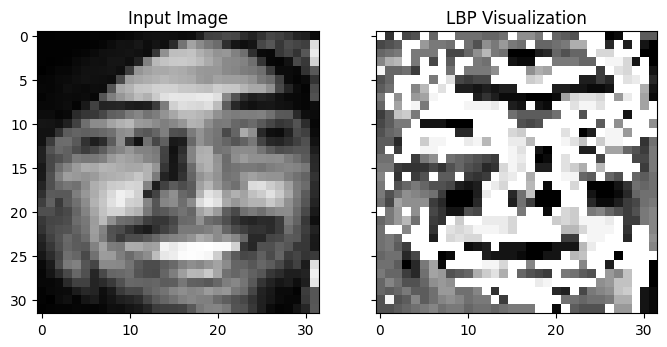

LBP Values:
[[25.  9. 10. ...  0.  0.  0.]
 [ 8.  1.  1. ... 12.  9. 25.]
 [ 0. 25. 14. ... 25. 12. 25.]
 ...
 [ 0.  0. 25. ... 11.  0.  0.]
 [ 0.  0.  1. ...  2.  0.  8.]
 [ 0.  0.  1. ...  0.  1.  7.]]


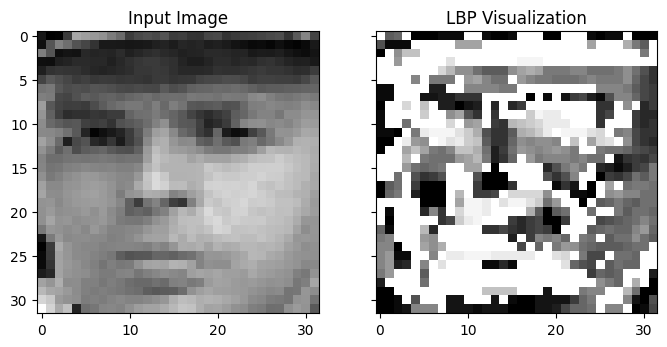

LBP Values:
[[ 0. 25.  0. ...  2. 25. 25.]
 [ 1.  1. 25. ...  2.  1.  1.]
 [ 0.  0. 25. ... 25.  1. 25.]
 ...
 [25.  6. 25. ...  1.  0.  0.]
 [ 0.  0.  0. ... 11. 25.  0.]
 [ 0.  0.  0. ... 25.  8. 25.]]


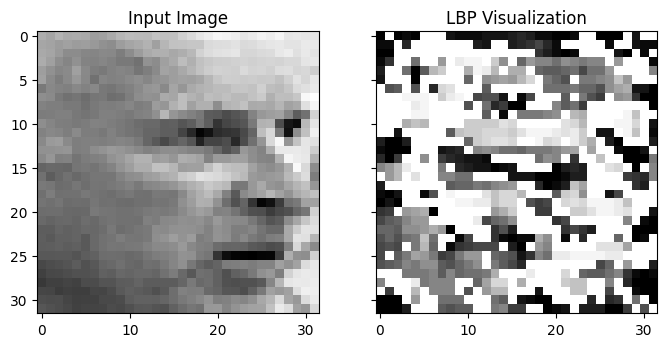

LBP Values:
[[ 7. 10.  9. ... 10.  9.  9.]
 [10. 11. 12. ...  7.  7.  8.]
 [11. 12.  9. ...  7.  6.  8.]
 ...
 [10. 12. 25. ...  0.  1. 11.]
 [ 9. 10. 10. ...  0.  1. 10.]
 [ 5. 24.  7. ...  0. 25.  7.]]


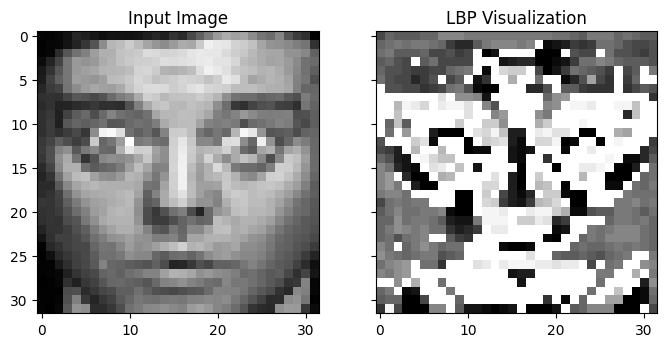

LBP Values:
[[ 7.  5.  9. ... 11. 10.  7.]
 [ 9.  9. 11. ...  9.  7.  6.]
 [10.  9.  9. ...  3. 11.  9.]
 ...
 [10. 11. 25. ...  4.  2.  5.]
 [25. 25.  7. ...  5.  0.  4.]
 [ 0.  0.  0. ... 12.  8.  6.]]


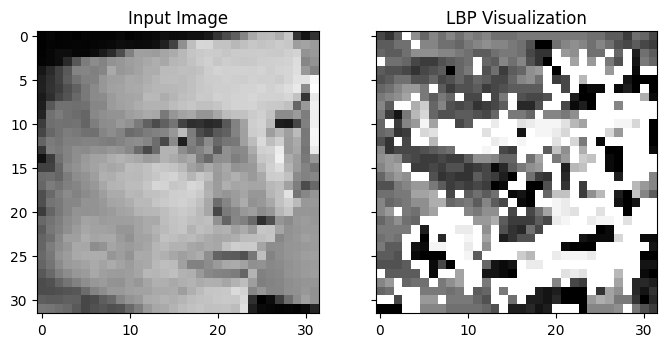

LBP visualization for Female images:
LBP Values:
[[ 0.  4. 25. ...  2.  8.  3.]
 [ 3.  6. 25. ...  7. 25. 25.]
 [ 5.  8. 25. ...  5. 25.  5.]
 ...
 [25. 25. 25. ... 10.  6.  7.]
 [25.  3.  2. ...  6.  4.  0.]
 [ 7.  2.  2. ...  3.  0.  0.]]


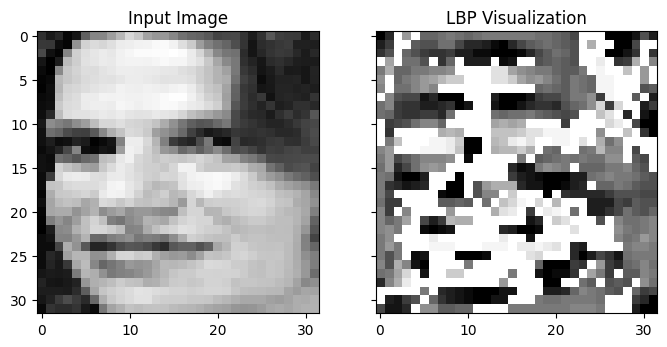

LBP Values:
[[ 8.  8. 11. ...  0.  0.  1.]
 [ 8. 25. 12. ...  0.  0.  1.]
 [ 9.  8. 10. ... 25.  2.  1.]
 ...
 [ 8.  9. 25. ... 11. 10.  9.]
 [ 6.  7.  1. ... 10.  9.  8.]
 [ 4.  0.  0. ...  9.  8.  7.]]


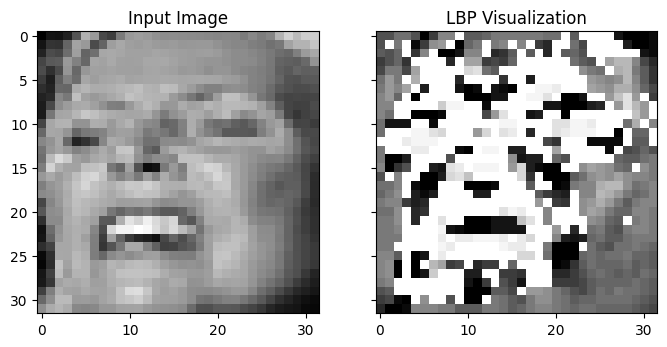

LBP Values:
[[ 2.  2.  2. ...  8.  8.  7.]
 [ 2.  3.  2. ...  9.  9.  8.]
 [ 6.  4. 10. ...  9.  9.  8.]
 ...
 [ 5. 11. 25. ... 25.  0.  1.]
 [ 1.  7. 12. ...  0.  0.  1.]
 [ 0.  4. 25. ...  0.  0.  1.]]


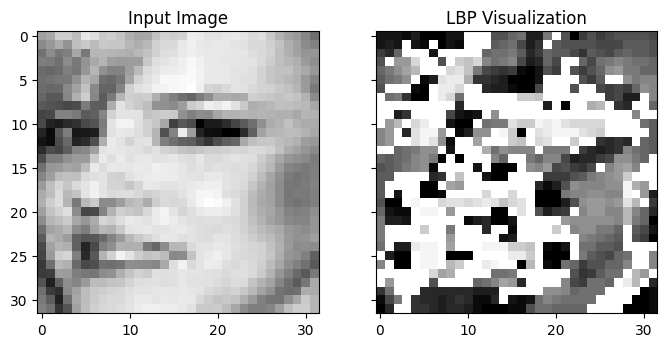

LBP Values:
[[ 1.  8.  9. ... 25.  0. 25.]
 [ 5.  8. 10. ... 10. 25. 25.]
 [ 4. 25. 11. ...  1.  1. 25.]
 ...
 [ 2. 10.  9. ... 25. 12.  2.]
 [ 0. 25. 25. ... 25.  9.  0.]
 [ 1.  1.  0. ... 25. 25.  1.]]


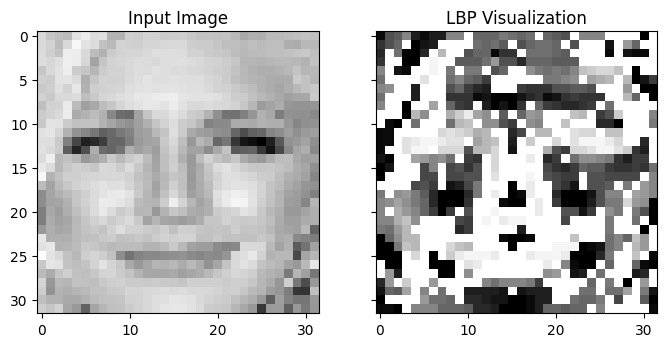

LBP Values:
[[ 7.  8. 11. ...  8.  8.  6.]
 [ 7. 10. 11. ... 11.  9.  8.]
 [ 8. 11. 10. ... 11. 12. 12.]
 ...
 [11.  0.  1. ... 10. 11. 12.]
 [ 2.  0.  1. ...  9. 10.  9.]
 [ 1.  0.  0. ...  8.  9.  8.]]


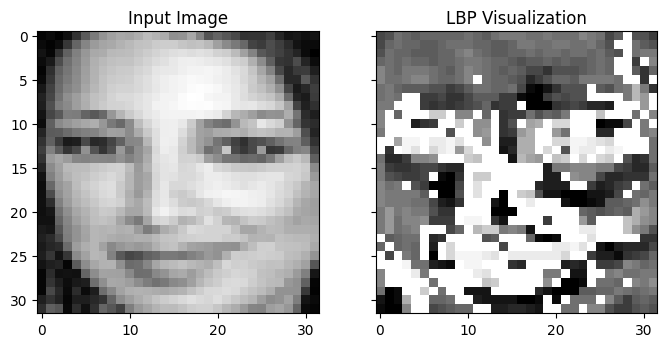

In [ ]:
# Apply LBP feature extraction and visualization to the first five male images
print("LBP visualization for Male images:")
for i in range(5):
    compute_and_visualize_lbp(gray_male[i])

# Apply LBP feature extraction and visualization to the first five female images
print("LBP visualization for Female images:")
for i in range(5):
    compute_and_visualize_lbp(gray_female[i])

LBP Image Histograms for Male images:


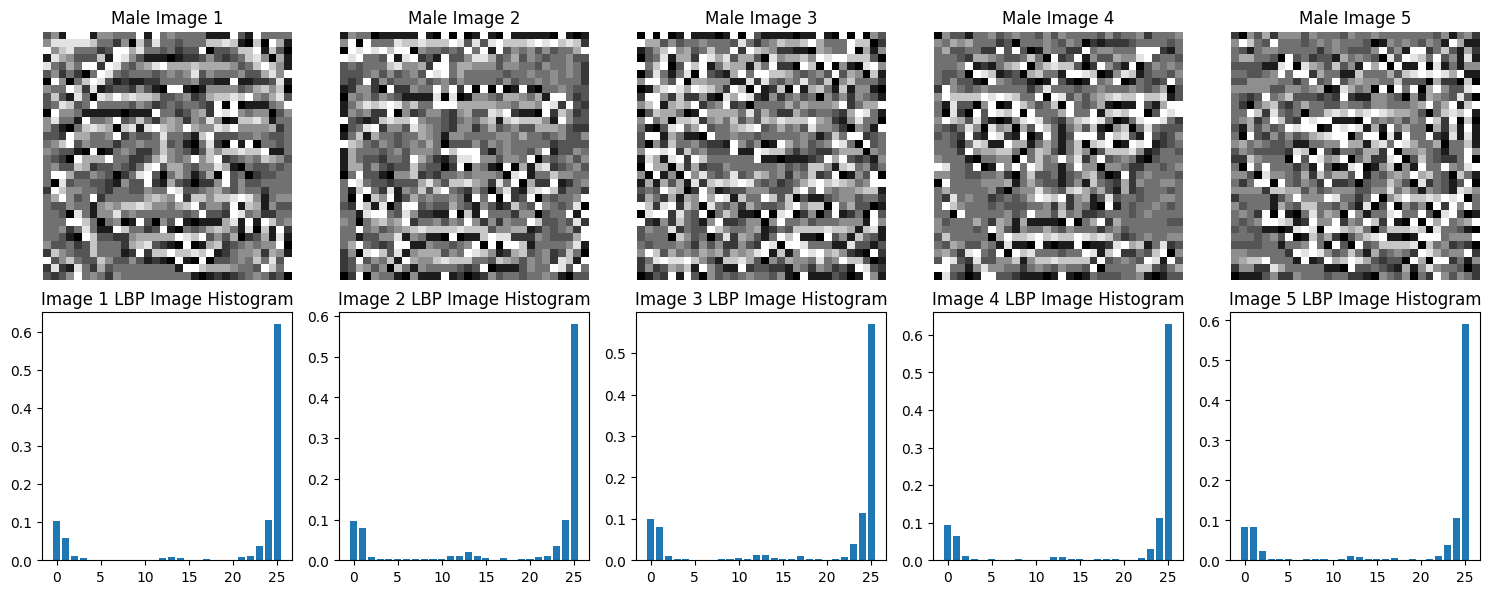

LBP Image Histograms for Female images:


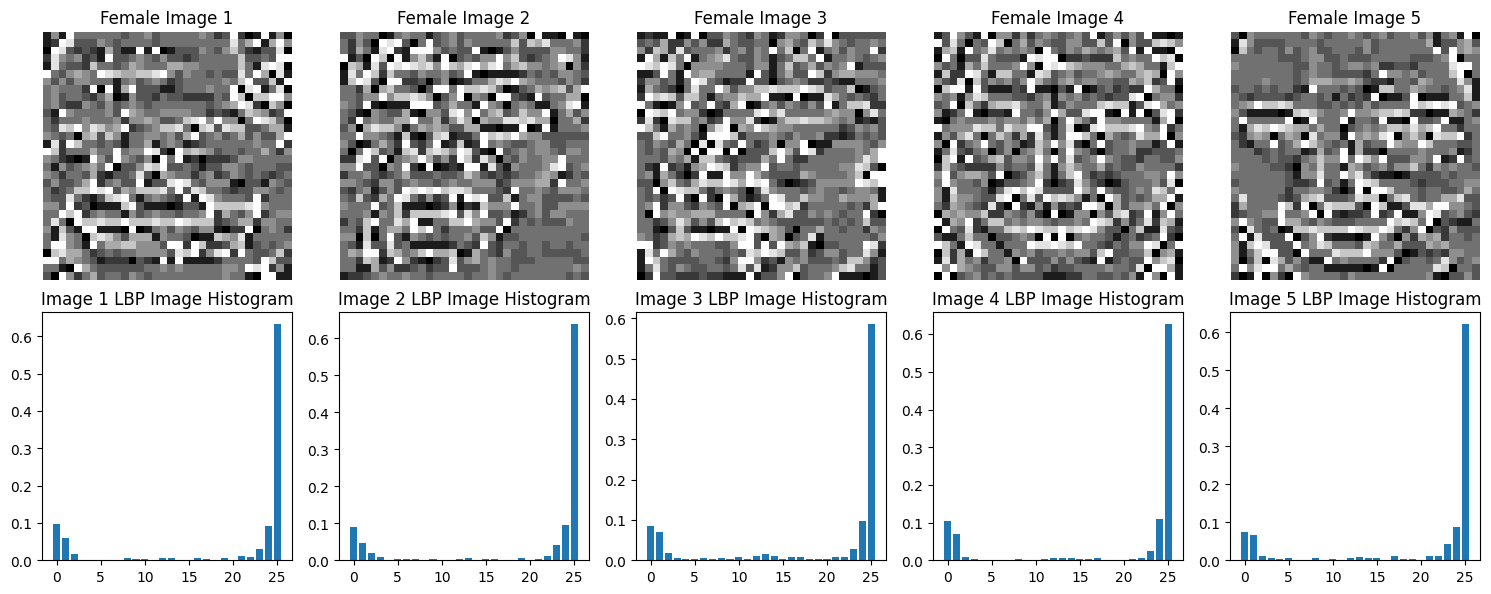

In [ ]:


# Function to plot histograms of LBP images
def plot_lbp_image_histograms(images, titles):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

    for i in range(5):
        lbp_image = local_binary_pattern(images[i], 8, 1, method='uniform')
        hist = extract_lbp(lbp_image)
        axes[0, i].imshow(lbp_image, cmap='gray')
        axes[0, i].set_title(titles[i])
        axes[0, i].axis('off')

        axes[1, i].bar(np.arange(len(hist)), hist, width=0.8)
        axes[1, i].set_title(f'Image {i+1} LBP Image Histogram')

    plt.tight_layout()
    plt.show()

# Assuming gray_male and gray_female contain the grayscale male and female images respectively

# Plot LBP image histograms for the first five male images
print("LBP Image Histograms for Male images:")
plot_lbp_image_histograms(gray_male[:5], [f"Male Image {i+1}" for i in range(5)])

# Plot LBP image histograms for the first five female images
print("LBP Image Histograms for Female images:")
plot_lbp_image_histograms(gray_female[:5], [f"Female Image {i+1}" for i in range(5)])

In [ ]:
# Function to compute LBP features and return the values
def compute_lbp(image):
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    return lbp.flatten()  # Return flattened LBP values

# Apply LBP feature extraction to all male images
lbp_male_values = [compute_lbp(image) for image in gray_male]

# Apply LBP feature extraction to all female images
lbp_female_values = [compute_lbp(image) for image in gray_female]


In [ ]:
from skimage.feature import hog
import matplotlib.pyplot as plt
import cv2


In [ ]:
# Function to compute HOG features and visualize the effect
def compute_and_visualize_hog(image):
    # Compute HOG features
    hog_features, hog_image = hog(image, visualize=True, pixels_per_cell=(8, 8), cells_per_block=(2, 2))

    # Print the HOG features (you can comment this line if the output is too lengthy)
    print("HOG Features:")
    print(hog_features)

    # Display the original image and HOG visualization
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Input Image')

    # Rescale histogram for better display
    hog_image_rescaled = cv2.resize(hog_image, (image.shape[1], image.shape[0]))

    ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax[1].set_title('HOG Visualization')
    plt.show()


HOG visualization for Male images:
HOG Features:
[0.06524133 0.0624764  0.08640533 0.02255691 0.01828737 0.01019603
 0.         0.         0.         0.03370726 0.13328878 0.27583719
 0.24031322 0.25159422 0.2700407  0.0080985  0.03777417 0.00263496
 0.07941656 0.27583719 0.27583719 0.27583719 0.27583719 0.02112548
 0.02457405 0.00277374 0.05456567 0.27454316 0.07340534 0.2074864
 0.27583719 0.27583719 0.19372371 0.14457278 0.20193907 0.05554997
 0.02851926 0.11277385 0.25566854 0.20332578 0.21287048 0.2284778
 0.00685203 0.03196022 0.0022294  0.09982024 0.08160227 0.16193377
 0.18181953 0.25566854 0.25566854 0.16559624 0.01840433 0.01177981
 0.23228727 0.06210727 0.17555144 0.25566854 0.25566854 0.16390702
 0.12232108 0.17085793 0.04700008 0.25200923 0.08328346 0.12758285
 0.11051933 0.16004554 0.19003096 0.13302295 0.15382595 0.22807797
 0.1097827  0.0897465  0.17809541 0.19996584 0.25551026 0.25551026
 0.18212341 0.02024116 0.01295548 0.13691388 0.13035799 0.05517659
 0.09281305 0.2

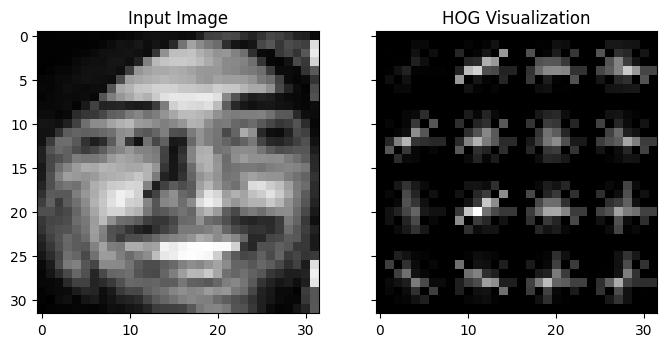

HOG Features:
[0.25978881 0.20754078 0.10664034 0.25978881 0.25978881 0.08976252
 0.11914094 0.01894388 0.         0.1118199  0.00886322 0.02805005
 0.17714237 0.25978881 0.16409093 0.00987607 0.01721525 0.01730264
 0.25479894 0.04010408 0.06664058 0.113932   0.25978881 0.25978881
 0.16319761 0.05839461 0.13532109 0.25978881 0.19010424 0.12901194
 0.05501695 0.20805351 0.25978881 0.11824744 0.24524036 0.0715885
 0.1174546  0.00930984 0.02946351 0.18606873 0.26780737 0.17235961
 0.01037374 0.01808274 0.01817454 0.07245576 0.01763345 0.01145667
 0.26780737 0.26780737 0.15625656 0.02874872 0.01161698 0.00842421
 0.26780737 0.19968376 0.13551296 0.0577893  0.21853751 0.26780737
 0.12420603 0.25759823 0.0751959  0.02060681 0.08594327 0.08137814
 0.26780737 0.26780737 0.26780737 0.26780737 0.12391293 0.13025342
 0.07244404 0.0176306  0.01145481 0.29058253 0.29491736 0.15623128
 0.02874407 0.0116151  0.00842285 0.09608367 0.         0.02074412
 0.13127315 0.29491736 0.29491736 0.01608641 0.  

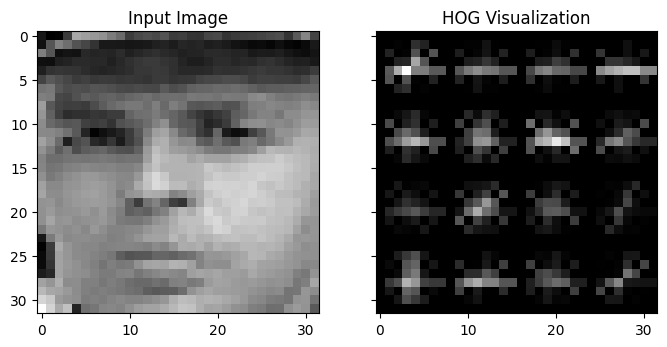

HOG Features:
[0.22517803 0.15969879 0.06540665 0.17121629 0.273908   0.06302665
 0.01897477 0.05598485 0.07192961 0.22088548 0.0981473  0.11542194
 0.02514968 0.1812375  0.273908   0.22265652 0.16785363 0.06442682
 0.06625528 0.10905649 0.06869566 0.18602825 0.273908   0.09273712
 0.09136513 0.14194629 0.04062697 0.08573686 0.08122482 0.11313667
 0.273908   0.273908   0.273908   0.273908   0.20821086 0.02821481
 0.13460294 0.05980889 0.07033569 0.01532568 0.1104423  0.29846532
 0.13568217 0.10228645 0.03926034 0.07651042 0.05466951 0.02178062
 0.07701004 0.11440445 0.13877412 0.14748843 0.16352869 0.03021388
 0.05224623 0.04949669 0.06894309 0.23542296 0.32762569 0.18971846
 0.25584945 0.12687929 0.01719351 0.04123719 0.03046368 0.27974788
 0.32762569 0.32762569 0.32762569 0.19526355 0.0923216  0.06582713
 0.05688437 0.04064597 0.01619357 0.05725582 0.08505802 0.1031765
 0.10965546 0.12158117 0.02246357 0.04740364 0.00720733 0.030643
 0.09030088 0.07480698 0.07455065 0.14758662 0.0557

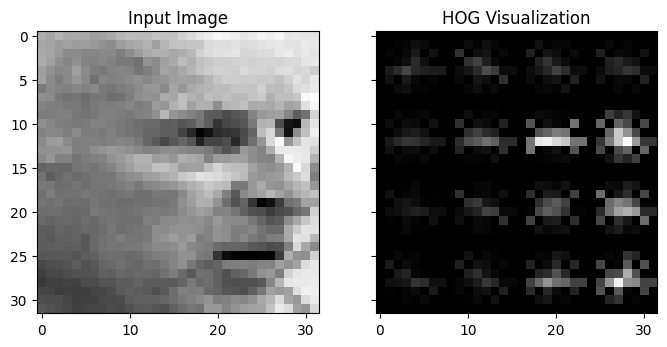

HOG Features:
[0.12939983 0.22614813 0.23427333 0.22340257 0.23184057 0.15814885
 0.         0.13661005 0.03175624 0.07175053 0.02971049 0.03851656
 0.19134545 0.2385993  0.2385993  0.1148709  0.03057506 0.03358037
 0.0686982  0.22464899 0.16248203 0.03567455 0.2385993  0.13946086
 0.13710337 0.12559399 0.2385993  0.2385993  0.11507618 0.06696942
 0.01776529 0.12895095 0.2385993  0.2385993  0.2385993  0.20618986
 0.07636839 0.03162266 0.04099548 0.20366043 0.25344672 0.25344672
 0.12226398 0.03254287 0.0357416  0.20260231 0.014181   0.11412484
 0.25344672 0.25344672 0.10325201 0.05714413 0.07469539 0.05485578
 0.25344672 0.12248247 0.07127956 0.01890867 0.13725022 0.25344672
 0.25344672 0.25344672 0.21946021 0.19062629 0.20406086 0.25344672
 0.17779263 0.0881532  0.09639355 0.10606099 0.1557757  0.16796264
 0.21969085 0.0153771  0.12375072 0.24211868 0.24211868 0.11196082
 0.06196396 0.08099559 0.0594826  0.24211868 0.08146478 0.05070756
 0.08341243 0.24211868 0.17327262 0.14718045 0.0

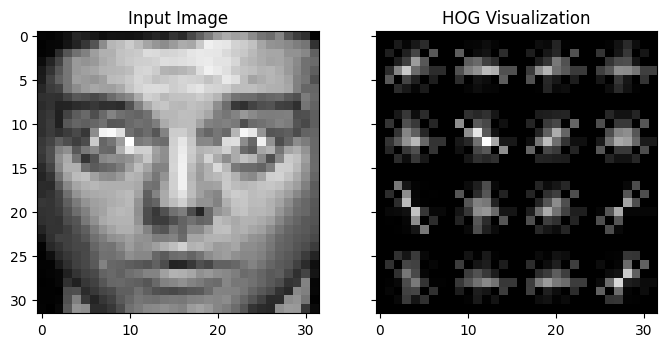

HOG Features:
[0.09210062 0.13746589 0.27376728 0.18414496 0.27376728 0.02199128
 0.05521353 0.01474915 0.16801469 0.07944853 0.05129553 0.27376728
 0.27376728 0.27376728 0.00536333 0.0101762  0.01884587 0.02589378
 0.15571454 0.07521077 0.08239256 0.12807503 0.25310328 0.02390454
 0.09652102 0.15100633 0.21402811 0.04799828 0.15817747 0.27376728
 0.26642532 0.23212684 0.25261946 0.14907083 0.10720186 0.03955525
 0.06956631 0.04491512 0.2488881  0.28352122 0.28352122 0.00469621
 0.00891043 0.01650173 0.02267298 0.17172987 0.03256698 0.13869269
 0.1520319  0.28352122 0.01165808 0.03578195 0.02162775 0.03009947
 0.042028   0.13850254 0.27656544 0.23328596 0.20325371 0.22119734
 0.13052863 0.09386754 0.03463517 0.031621   0.09772345 0.08833313
 0.15344085 0.28352122 0.28352122 0.2456207  0.17223704 0.22728167
 0.16433295 0.03116422 0.13271879 0.14548344 0.26994849 0.01115593
 0.03424072 0.02069618 0.02880299 0.23454819 0.20156263 0.01921825
 0.04358648 0.26994849 0.09293578 0.1073343  0.0

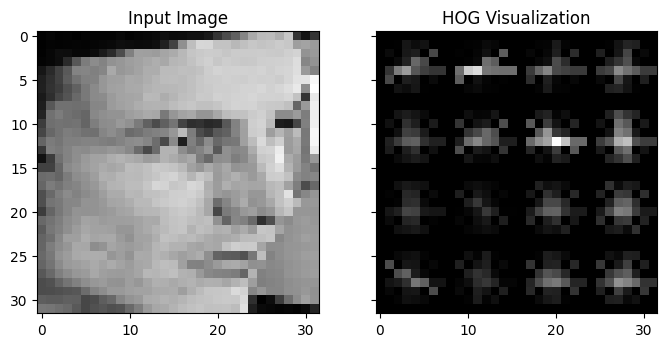

HOG visualization for Female images:
HOG Features:
[0.28615156 0.28615156 0.28615156 0.06159871 0.13733934 0.00967748
 0.0123765  0.00532623 0.00835967 0.117223   0.0168538  0.01985525
 0.10029401 0.17579227 0.07174941 0.0076882  0.00949003 0.00526088
 0.15519585 0.22339784 0.1292613  0.28615156 0.28615156 0.28615156
 0.07849044 0.14213722 0.11573441 0.13099327 0.12910695 0.20182239
 0.23184325 0.20928078 0.18988511 0.13937852 0.         0.25873614
 0.12461531 0.01791664 0.02110736 0.10661875 0.18687807 0.07627407
 0.00817303 0.01008849 0.00559264 0.26549947 0.02937664 0.00822423
 0.01133286 0.         0.19710964 0.26549947 0.20418187 0.23631366
 0.13925397 0.13724868 0.2145497  0.24646373 0.22247843 0.20185963
 0.148168   0.         0.26549947 0.20696083 0.08684093 0.19061221
 0.26549947 0.26549947 0.26549947 0.16271173 0.02501358 0.
 0.29838948 0.03565054 0.00998066 0.0137532  0.         0.23920592
 0.29838948 0.24778854 0.28678266 0.1205488  0.03324682 0.05524392
 0.01432605 0.03174

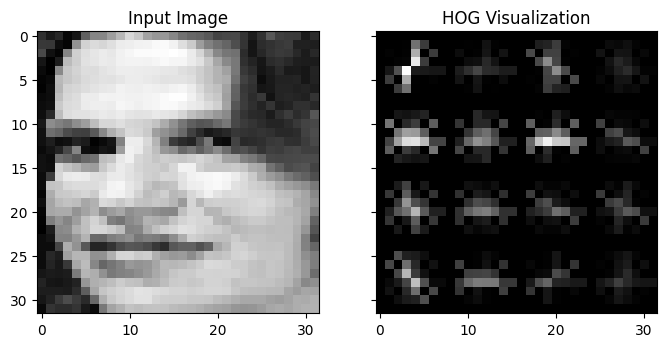

HOG Features:
[0.26956735 0.26956735 0.26956735 0.09017713 0.16168082 0.04094385
 0.02581974 0.02533379 0.07567738 0.12424754 0.03801982 0.14153035
 0.04387771 0.12062539 0.12597391 0.01541946 0.01848543 0.00937404
 0.07315749 0.26956735 0.17565148 0.26956735 0.26956735 0.21387888
 0.06358307 0.14038092 0.19770247 0.26956735 0.15940772 0.1619823
 0.15619704 0.17388676 0.16052247 0.16155958 0.15738091 0.22520398
 0.16692484 0.05107909 0.19014404 0.05894908 0.16205852 0.16924419
 0.02071583 0.02483491 0.0125939  0.02519238 0.06562241 0.18174675
 0.14891366 0.11062008 0.1132064  0.11643314 0.04118051 0.08893895
 0.2509338  0.21416204 0.21762096 0.20984853 0.23361442 0.21565969
 0.21705303 0.21143906 0.2509338  0.08300002 0.12348512 0.04277675
 0.2509338  0.2509338  0.2509338  0.24830535 0.12843924 0.13527936
 0.02554019 0.06652841 0.18425599 0.1509696  0.11214733 0.11476935
 0.11804065 0.04174906 0.09016686 0.26223701 0.08481633 0.05872639
 0.04724995 0.19550393 0.26575443 0.26227751 0.08

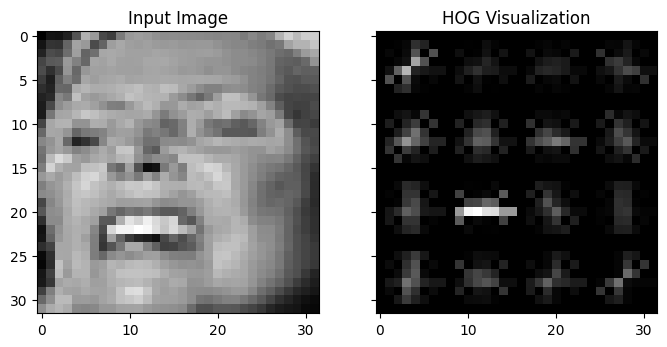

HOG Features:
[0.18003303 0.24296352 0.10039633 0.08345492 0.2334328  0.09274484
 0.10541599 0.1076729  0.07226964 0.16268628 0.24296352 0.21572441
 0.16734785 0.19875383 0.05206369 0.04373452 0.         0.0103113
 0.18793869 0.24296352 0.24296352 0.24296352 0.23841328 0.11231439
 0.20124589 0.06005161 0.19421283 0.24296352 0.1780871  0.21829138
 0.08885103 0.13811196 0.19459353 0.03077346 0.16593259 0.02844532
 0.16014617 0.32355316 0.21235619 0.16473496 0.19565058 0.05125079
 0.04305167 0.         0.0101503  0.06589302 0.06462763 0.02798779
 0.19170231 0.20896495 0.05512416 0.01055378 0.05485433 0.01819973
 0.32159014 0.17530653 0.21488308 0.08746375 0.13595554 0.19155523
 0.03029298 0.16334179 0.02800119 0.         0.17160306 0.04433845
 0.32355316 0.32355316 0.32355316 0.05101928 0.08187947 0.17901314
 0.07770348 0.07621129 0.03300423 0.22606243 0.24641918 0.06500444
 0.01244541 0.06468625 0.02146179 0.27250767 0.02721728 0.01557505
 0.03175155 0.07480199 0.00362843 0.05890103 0.22

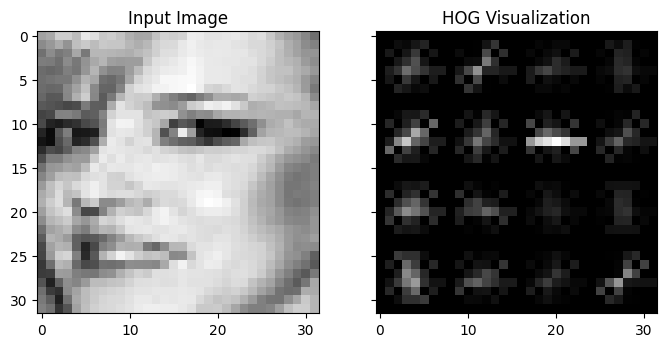

HOG Features:
[0.25894296 0.2019647  0.2684858  0.06905958 0.05384152 0.00575252
 0.05124026 0.09880204 0.08193346 0.12426402 0.08022519 0.08180501
 0.05661416 0.05028464 0.01158173 0.02224571 0.00734708 0.00463783
 0.23878831 0.2684858  0.2684858  0.2684858  0.2684858  0.10942265
 0.11320226 0.17977177 0.05750305 0.08686679 0.12820651 0.12370514
 0.17162531 0.2684858  0.23964549 0.2684858  0.16288446 0.23584348
 0.1439197  0.09291496 0.09474467 0.06556921 0.0582385  0.01341369
 0.02576447 0.00850922 0.00537142 0.08117916 0.01467249 0.00526712
 0.00235553 0.01690255 0.04206877 0.16104961 0.15288455 0.06985751
 0.10060711 0.1484858  0.14327242 0.19877245 0.260235   0.260235
 0.260235   0.188649   0.260235   0.260235   0.21526523 0.260235
 0.260235   0.260235   0.2199669  0.260235   0.11595485 0.21092745
 0.07557033 0.01365874 0.0049032  0.00219278 0.01573472 0.03916216
 0.14992238 0.14232146 0.06503092 0.05775446 0.03306585 0.02300714
 0.02945509 0.14940818 0.0969738  0.11499005 0.09565

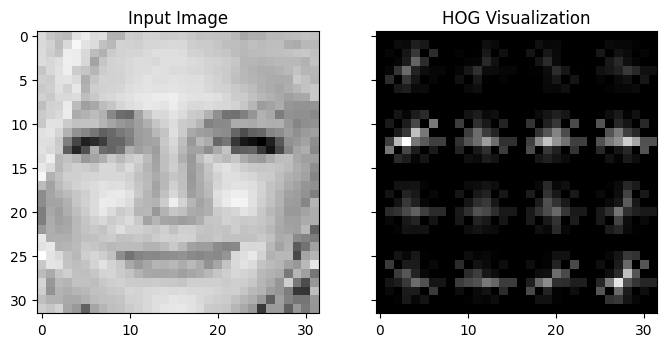

HOG Features:
[0.29050971 0.29050971 0.25280482 0.01375073 0.04150216 0.
 0.00241204 0.         0.         0.11291268 0.12104807 0.16779937
 0.11431657 0.06049987 0.         0.         0.         0.
 0.29050971 0.         0.09530871 0.15876223 0.29050971 0.29050971
 0.23790821 0.08088539 0.1072398  0.17925597 0.07424377 0.02808871
 0.         0.21928948 0.16133899 0.25561311 0.29050971 0.26208329
 0.1255893  0.13463805 0.18663808 0.12715081 0.06729215 0.
 0.         0.         0.         0.13915644 0.02709418 0.00582998
 0.01813912 0.17285992 0.28362977 0.07702127 0.03629517 0.11520628
 0.1993809  0.08257906 0.0312422  0.         0.24390894 0.17945239
 0.28362977 0.28362977 0.28362977 0.25013377 0.09639398 0.15809289
 0.28362977 0.28362977 0.25359155 0.08201767 0.17243071 0.14201552
 0.10136689 0.01973644 0.00424678 0.01321323 0.12591779 0.29291931
 0.05610524 0.0264388  0.08392067 0.057771   0.01076326 0.
 0.02012106 0.05803916 0.04513167 0.29291931 0.29291931 0.05663487
 0.18220703 0

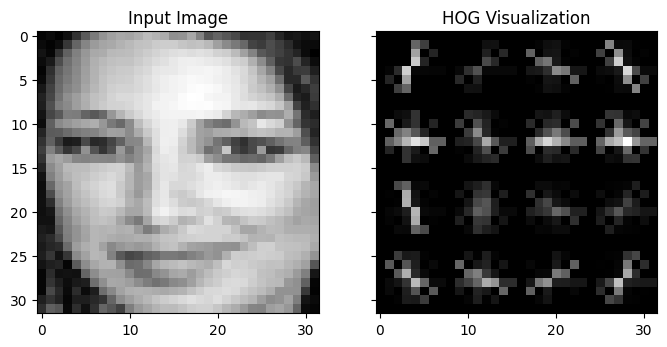

In [ ]:
# Apply HOG feature extraction and visualization to the first five male images
print("HOG visualization for Male images:")
for i in range(5):
    compute_and_visualize_hog(gray_male[i])

# Apply HOG feature extraction and visualization to the first five female images
print("HOG visualization for Female images:")
for i in range(5):
    compute_and_visualize_hog(gray_female[i])

In [ ]:
# Function to compute HOG features
def compute_hog_features(image):
    hog_features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    return hog_features

# Assuming you have the lists gamma_corrected_male and gamma_corrected_female containing images

# Extract HOG features for male images
hog_male_features = [compute_hog_features(img) for img in gray_male]

# Extract HOG features for female images
hog_female_features = [compute_hog_features(img) for img in gray_female]

Images and Histograms after Effect for Male images:


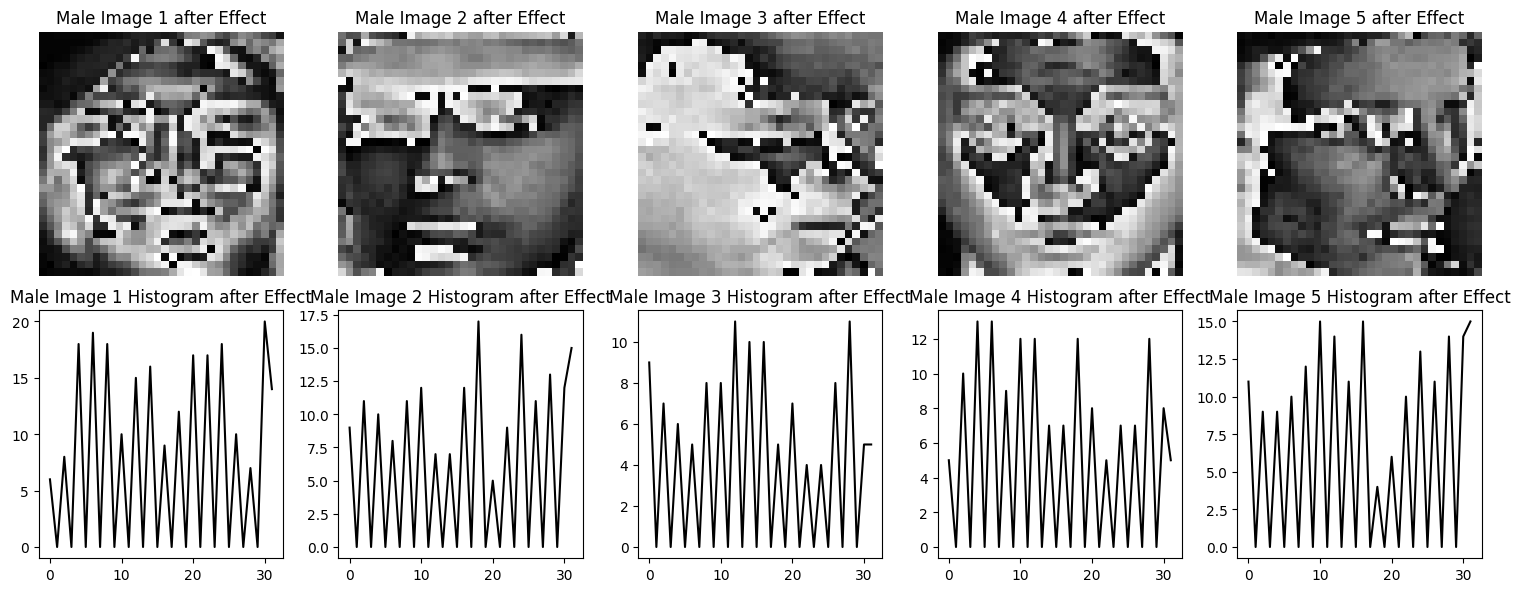

Images and Histograms after Effect for Female images:


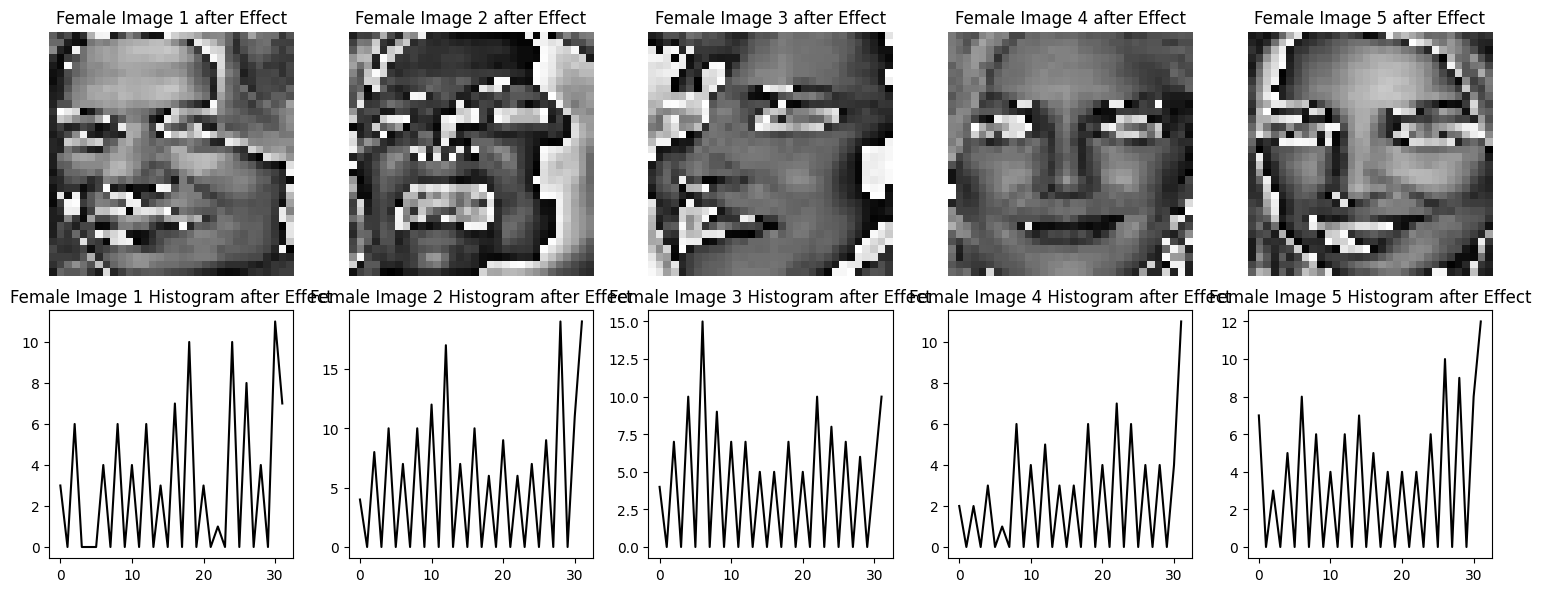

In [ ]:

def plot_image_and_histogram_after_effect(images, titles):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

    for i in range(5):
        # Apply some effect on pixel intensities (example: scaling by a factor)
        modified_pixel_intensity = images[i] * 2  # Example effect: pixel intensities scaled by 2

        # Plotting the modified image
        axes[0, i].imshow(modified_pixel_intensity, cmap='gray')
        axes[0, i].set_title(f'{titles[i]} after Effect')
        axes[0, i].axis('off')

        # Plotting histogram of the modified pixel intensity image
        hist, bins = np.histogram(modified_pixel_intensity.flatten(), bins=32, range=(0, 32))
        axes[1, i].plot(hist, color='black')
        axes[1, i].set_title(f'{titles[i]} Histogram after Effect')

    plt.tight_layout()
    plt.show()

# Assuming gray_male and gray_female contain the grayscale male and female images respectively

# Plot images and their histograms after applying an effect for the first five male images
print("Images and Histograms after Effect for Male images:")
plot_image_and_histogram_after_effect(gray_male[:5], [f"Male Image {i+1}" for i in range(5)])

# Plot images and their histograms after applying an effect for the first five female images
print("Images and Histograms after Effect for Female images:")
plot_image_and_histogram_after_effect(gray_female[:5], [f"Female Image {i+1}" for i in range(5)])

In [ ]:

def compute_pixel_intensity(image):
    flattened_image = image.flatten()
    return flattened_image

# Assuming gray_male and gray_female contain the grayscale male and female images respectively

# Extract pixel intensity values for all male images
pixel_intensity_male_features = [compute_pixel_intensity(img) for img in gray_male]

# Extract pixel intensity values for all female images
pixel_intensity_female_features = [compute_pixel_intensity(img) for img in gray_female]



In [ ]:
##Haralick feature

Haralick Texture Features and Values for Male images:


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

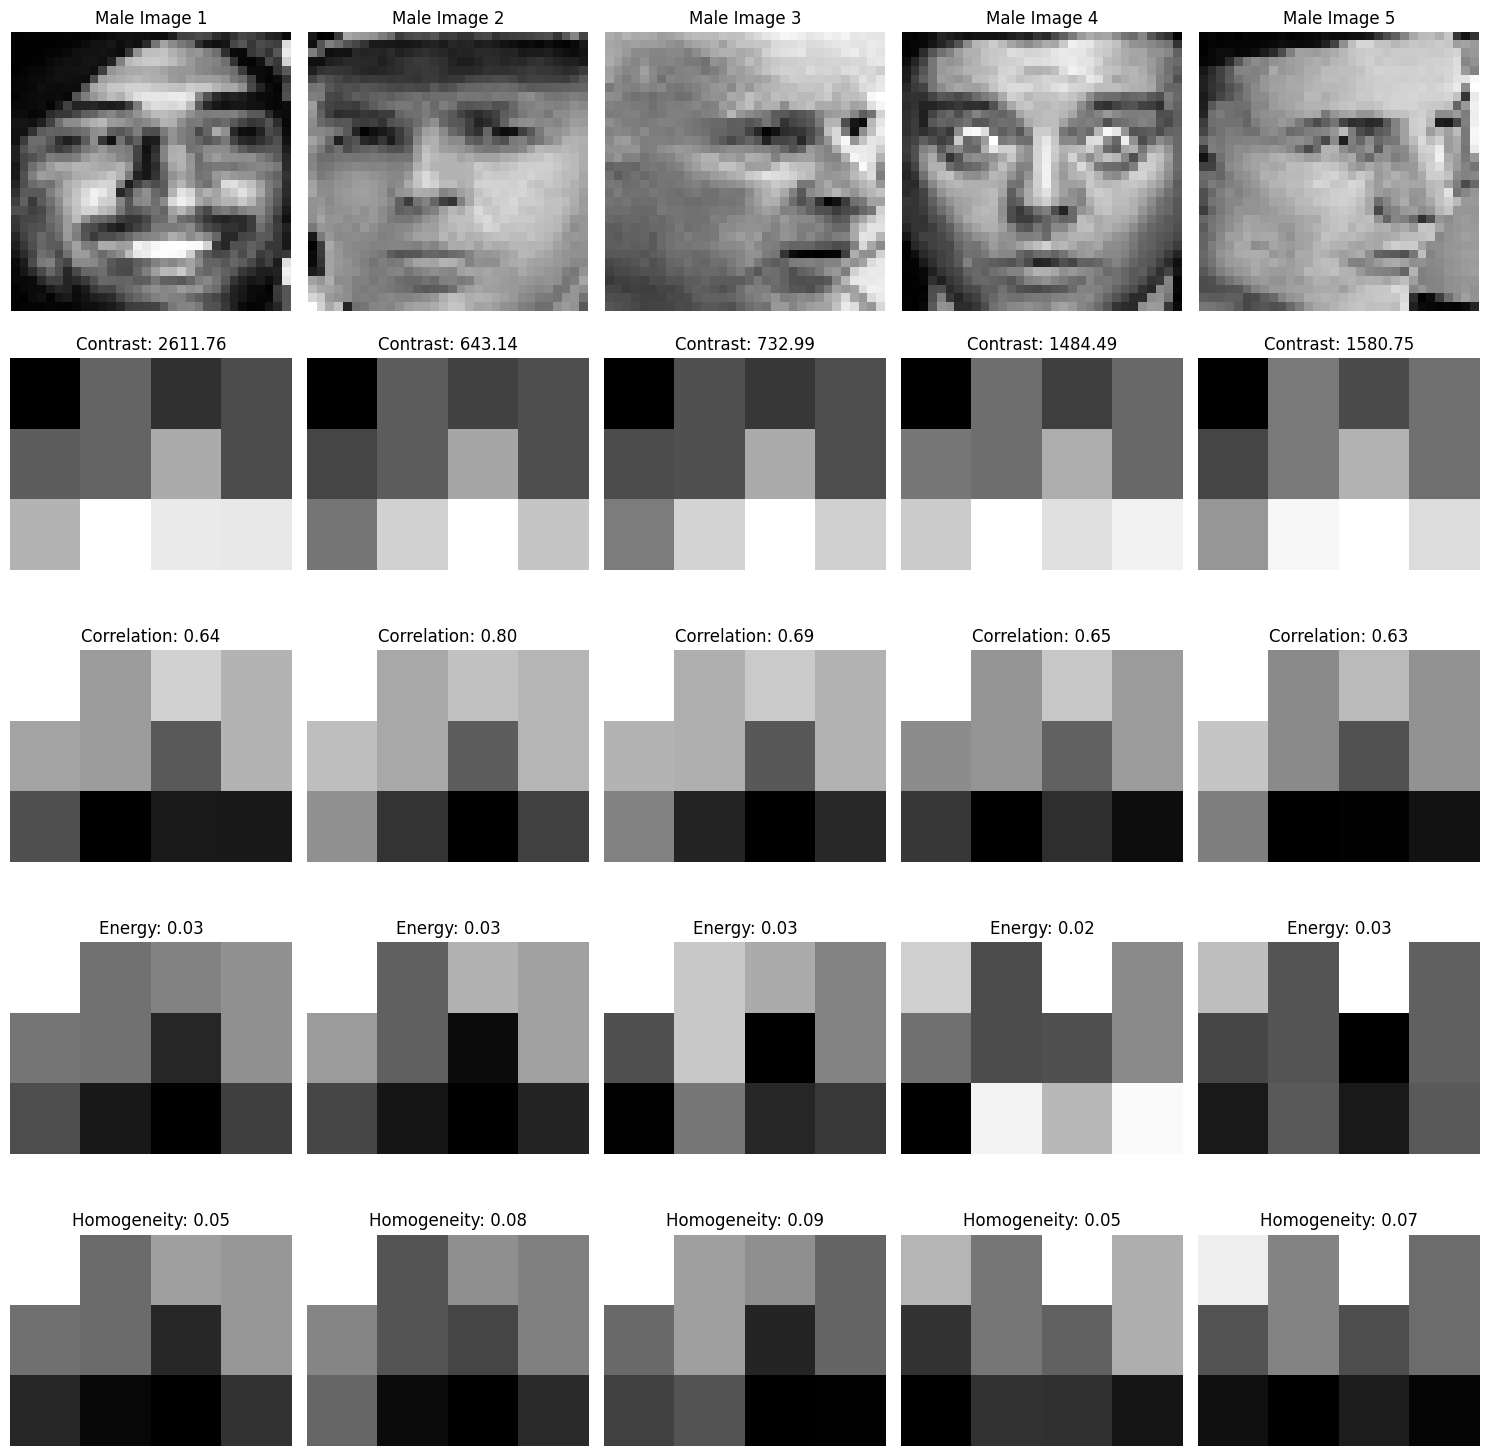

Haralick Texture Features and Values for Female images:


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

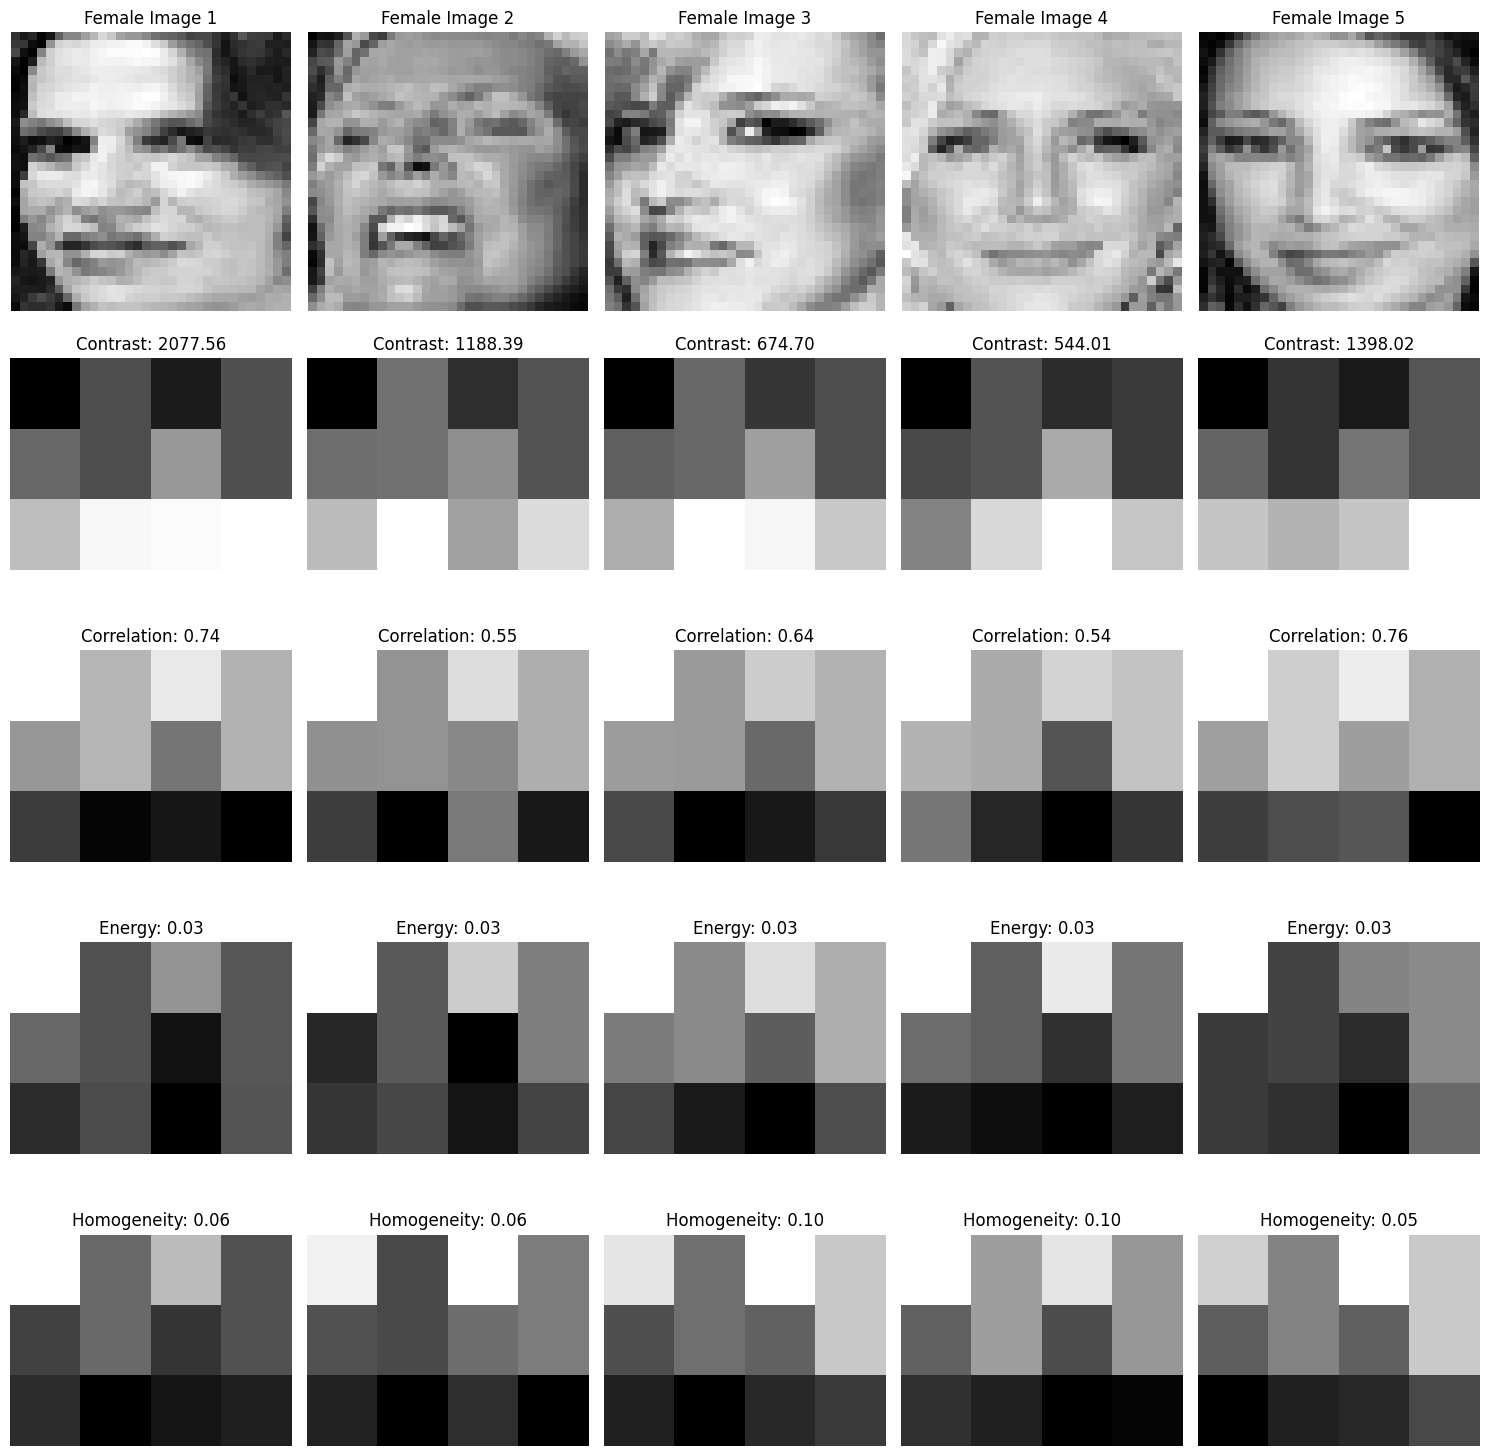

In [ ]:
from skimage.feature import greycomatrix, greycoprops

# Function to compute Haralick texture features as images and return their values
def compute_haralick_features(image):
    distances = [1, 2, 3]  # You can adjust the distances for texture analysis
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # You can adjust the angles for texture analysis
    glcm = greycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)

    # Compute Haralick texture features
    contrast = greycoprops(glcm, 'contrast')
    correlation = greycoprops(glcm, 'correlation')
    energy = greycoprops(glcm, 'energy')
    homogeneity = greycoprops(glcm, 'homogeneity')

    return contrast, correlation, energy, homogeneity

# Function to display images with Haralick texture features and their values
def display_images_with_haralick_effect(images, titles):
    fig, axes = plt.subplots(nrows=5, ncols=len(images), figsize=(15, 15))

    for i, img in enumerate(images):
        contrast, correlation, energy, homogeneity = compute_haralick_features(img)

        axes[0, i].imshow(img, cmap='gray')
        axes[0, i].set_title(titles[i])
        axes[0, i].axis('off')

        axes[1, i].imshow(contrast, cmap='gray')
        axes[1, i].set_title(f'Contrast: {contrast.mean():.2f}')
        axes[1, i].axis('off')

        axes[2, i].imshow(correlation, cmap='gray')
        axes[2, i].set_title(f'Correlation: {correlation.mean():.2f}')
        axes[2, i].axis('off')

        axes[3, i].imshow(energy, cmap='gray')
        axes[3, i].set_title(f'Energy: {energy.mean():.2f}')
        axes[3, i].axis('off')

        axes[4, i].imshow(homogeneity, cmap='gray')
        axes[4, i].set_title(f'Homogeneity: {homogeneity.mean():.2f}')
        axes[4, i].axis('off')

    plt.tight_layout()
    plt.show()

# Assuming you have a list of grayscale images named grayscale_images_male and grayscale_images_female with 5000 images each

# Display Haralick texture features and their values for the first five male images
print("Haralick Texture Features and Values for Male images:")
display_images_with_haralick_effect(gray_male[:5], ['Male Image 1', 'Male Image 2', 'Male Image 3', 'Male Image 4', 'Male Image 5'])

# Display Haralick texture features and their values for the first five female images
print("Haralick Texture Features and Values for Female images:")
display_images_with_haralick_effect(gray_female[:5], ['Female Image 1', 'Female Image 2', 'Female Image 3', 'Female Image 4', 'Female Image 5'])


In [ ]:
import pandas as pd
import numpy as np
from skimage.feature import greycomatrix, greycoprops

# Function to compute Haralick texture features
def compute_haralick_features(image):
    distances = [1, 2, 3]  # You can adjust the distances for texture analysis
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # You can adjust the angles for texture analysis
    glcm = greycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)

    # Compute Haralick texture features
    contrast = greycoprops(glcm, 'contrast').ravel()
    correlation = greycoprops(glcm, 'correlation').ravel()
    energy = greycoprops(glcm, 'energy').ravel()
    homogeneity = greycoprops(glcm, 'homogeneity').ravel()

    return np.concatenate([contrast, correlation, energy, homogeneity])

# Assuming you have a list of grayscale images named grayscale_images_male and grayscale_images_female with 5000 images each

# Extract Haralick texture features for all male images
haralick_male_features = []
for image in gray_male:
    features = compute_haralick_features(image)
    haralick_male_features.append(features)

# Extract Haralick texture features for all female images
haralick_female_features = []
for image in gray_female:
    features = compute_haralick_features(image)
    haralick_female_features.append(features)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

Gabor Filter Effects for Male images:


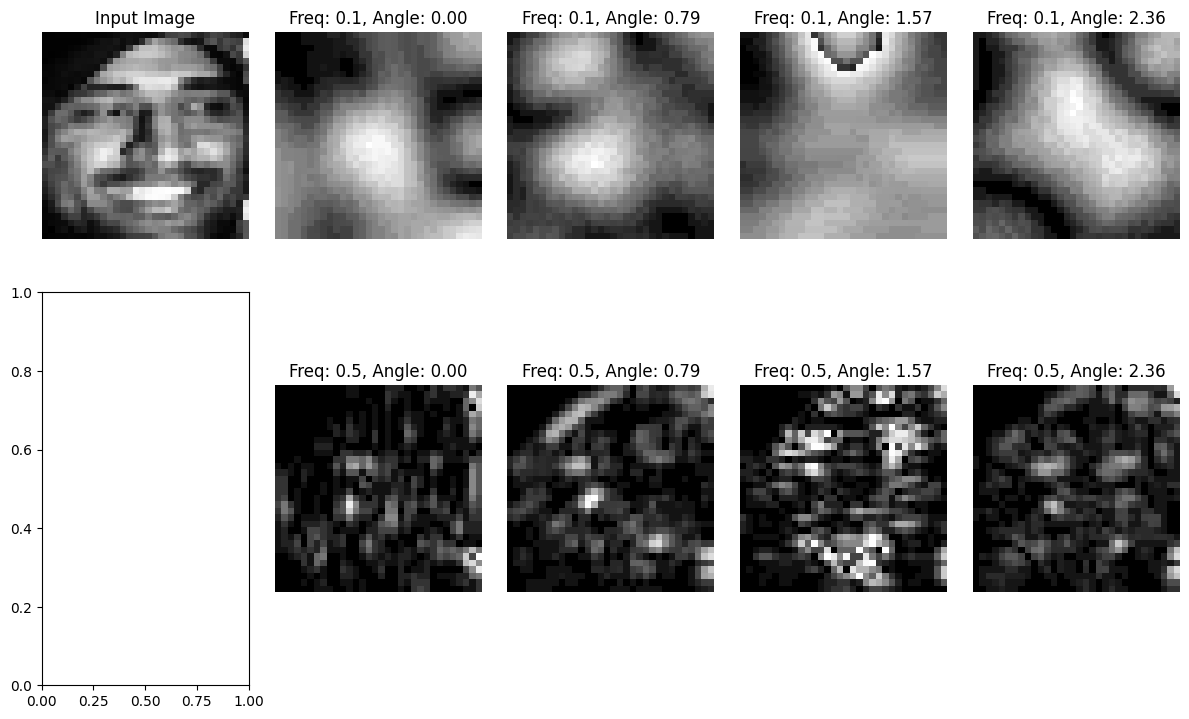

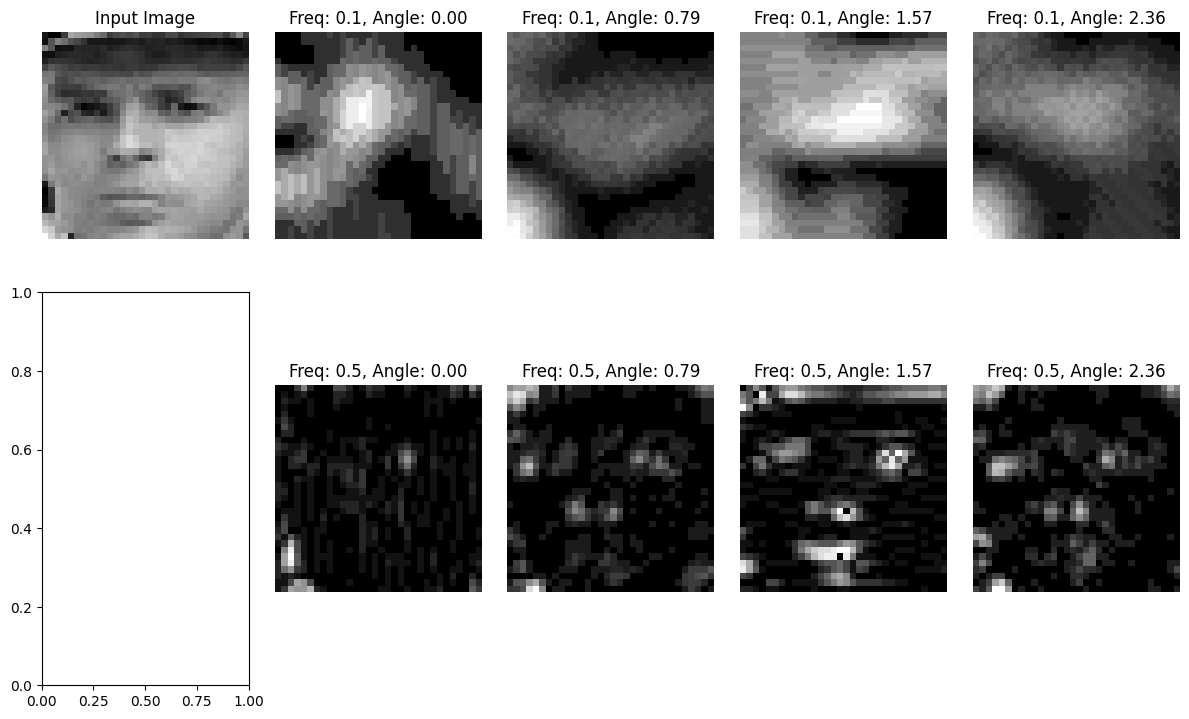

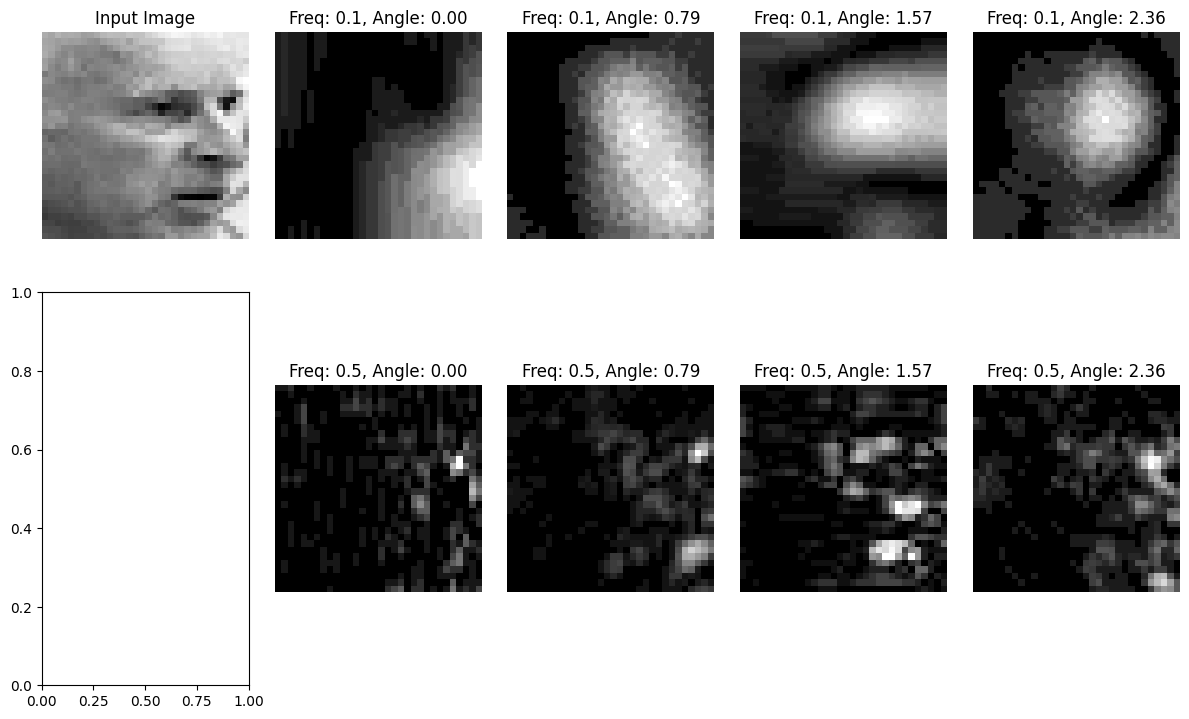

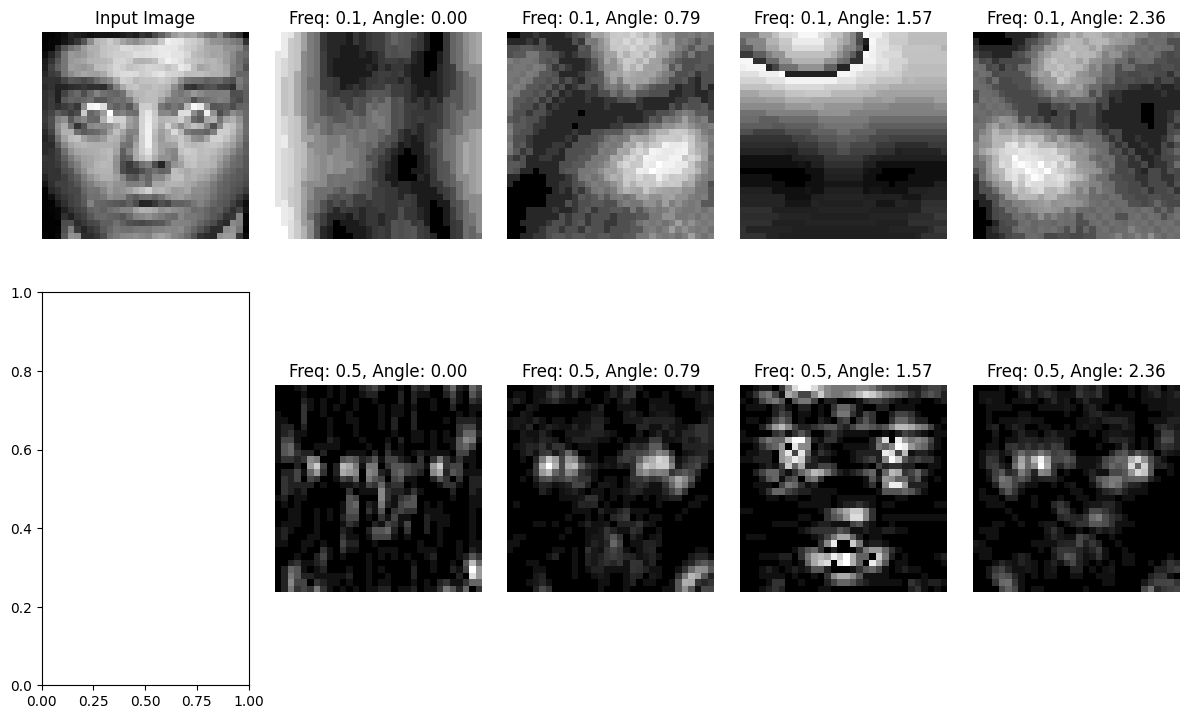

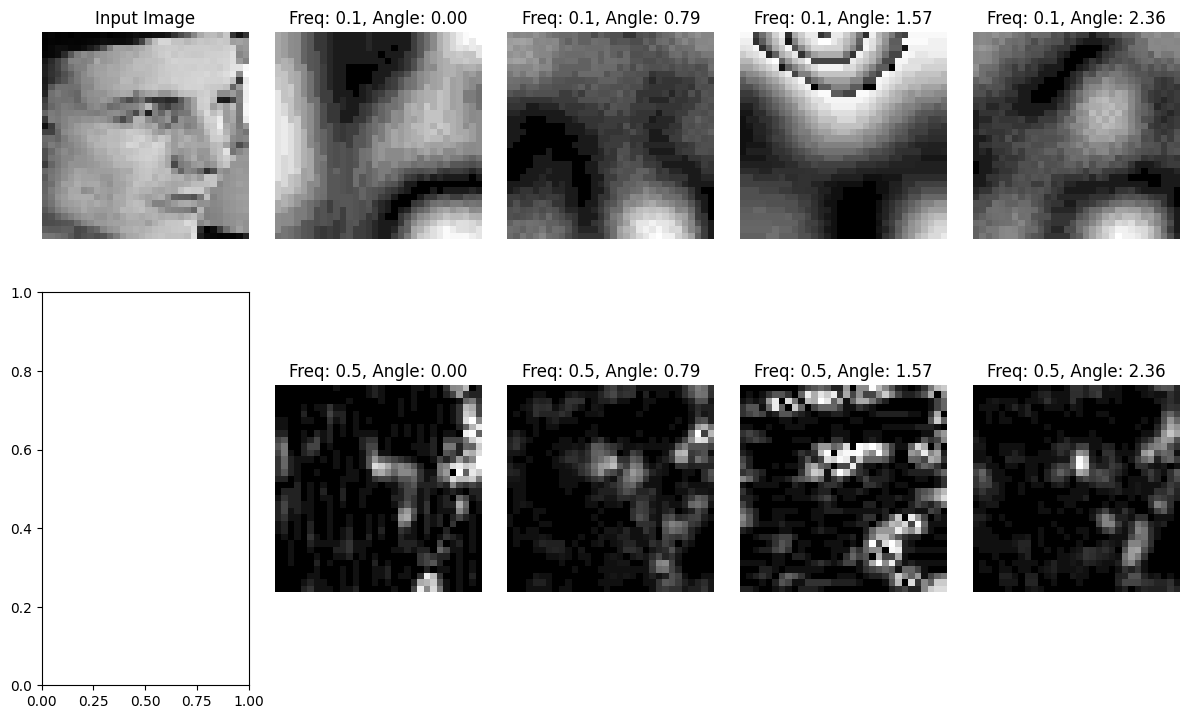

Gabor Filter Effects for Female images:


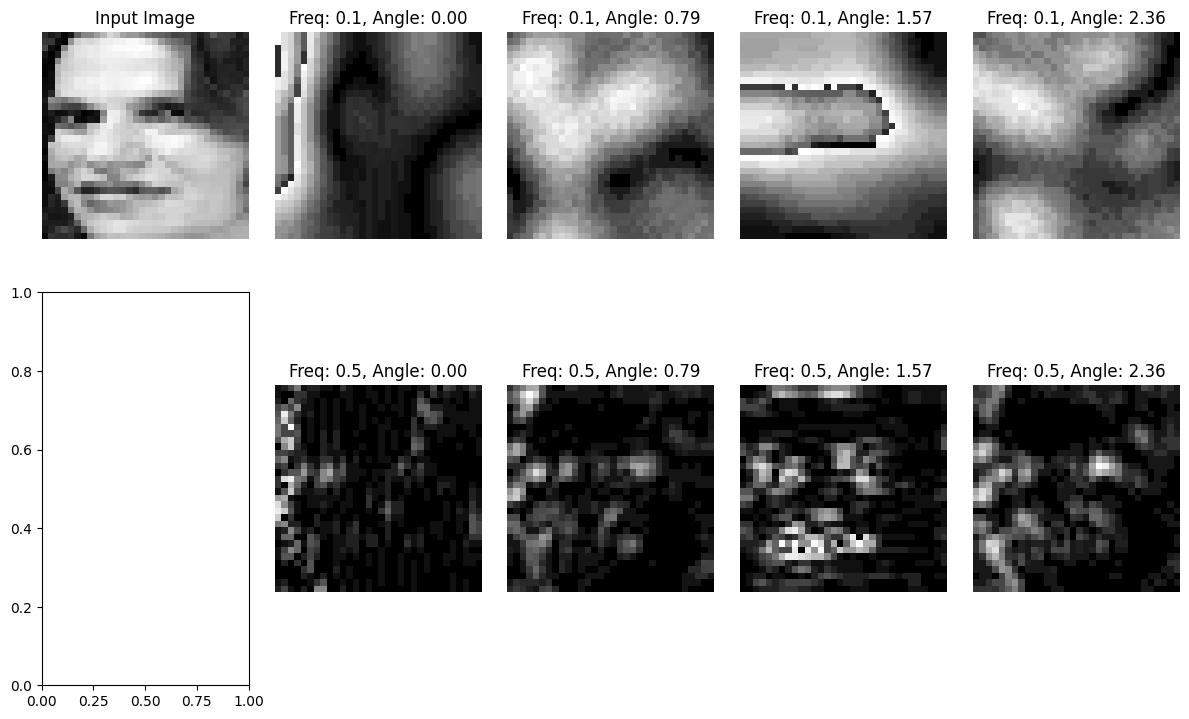

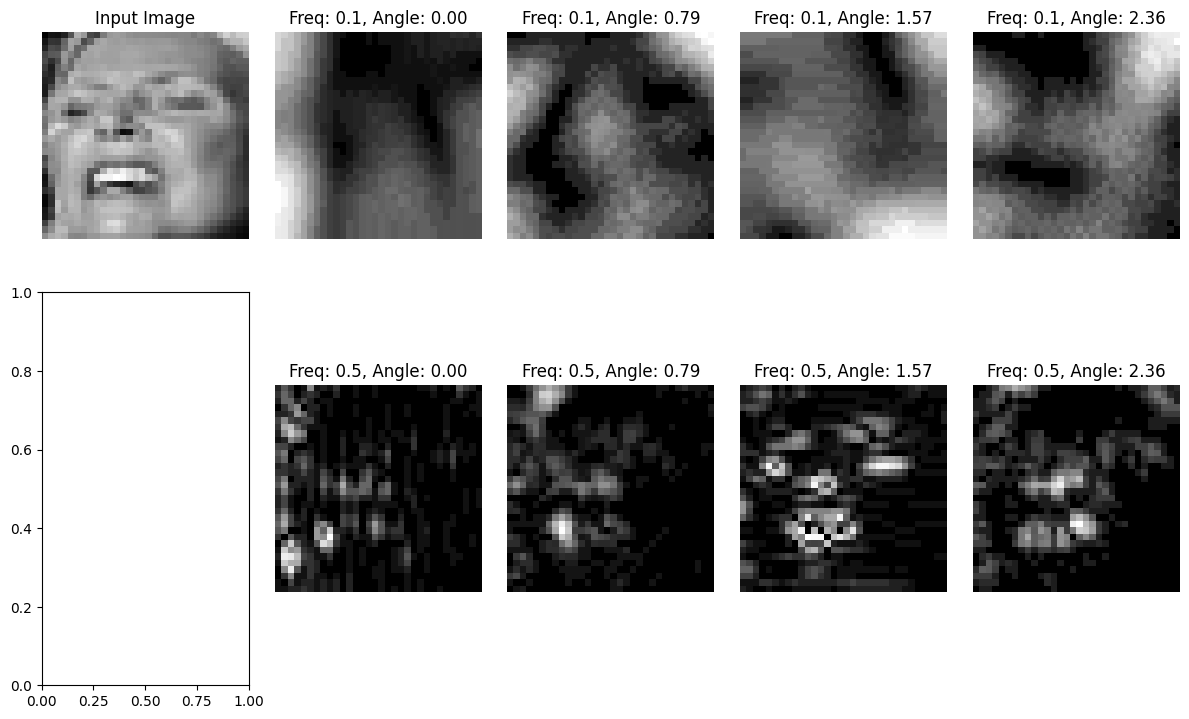

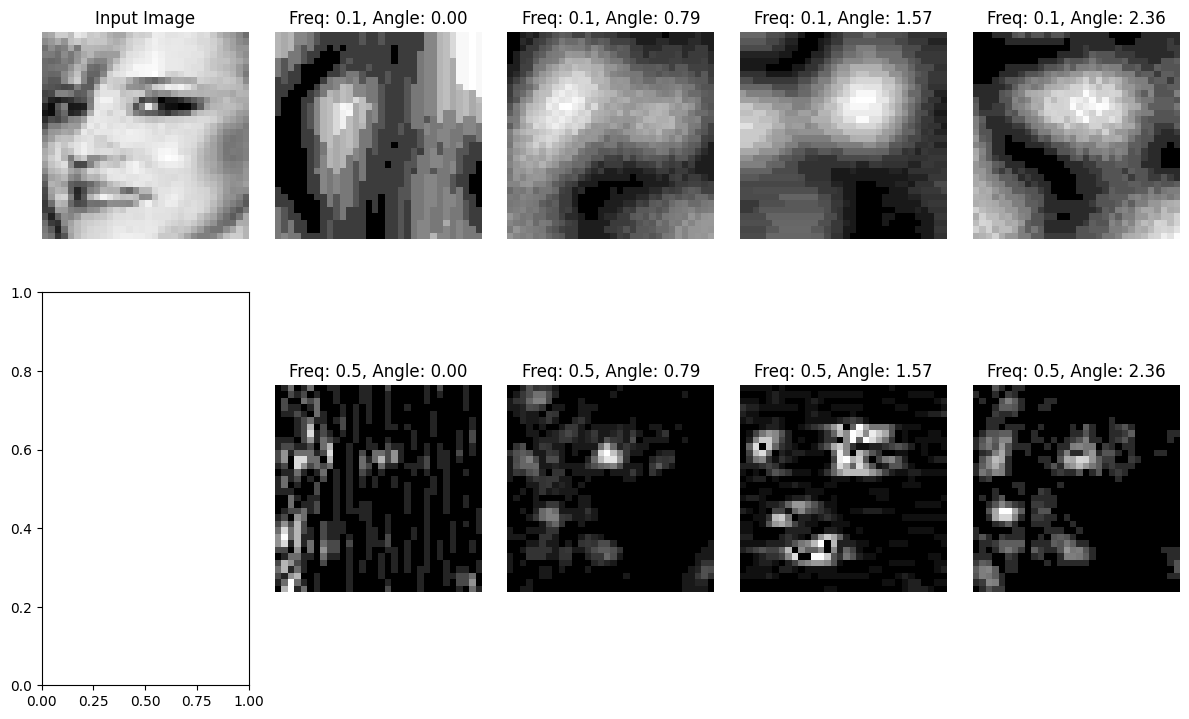

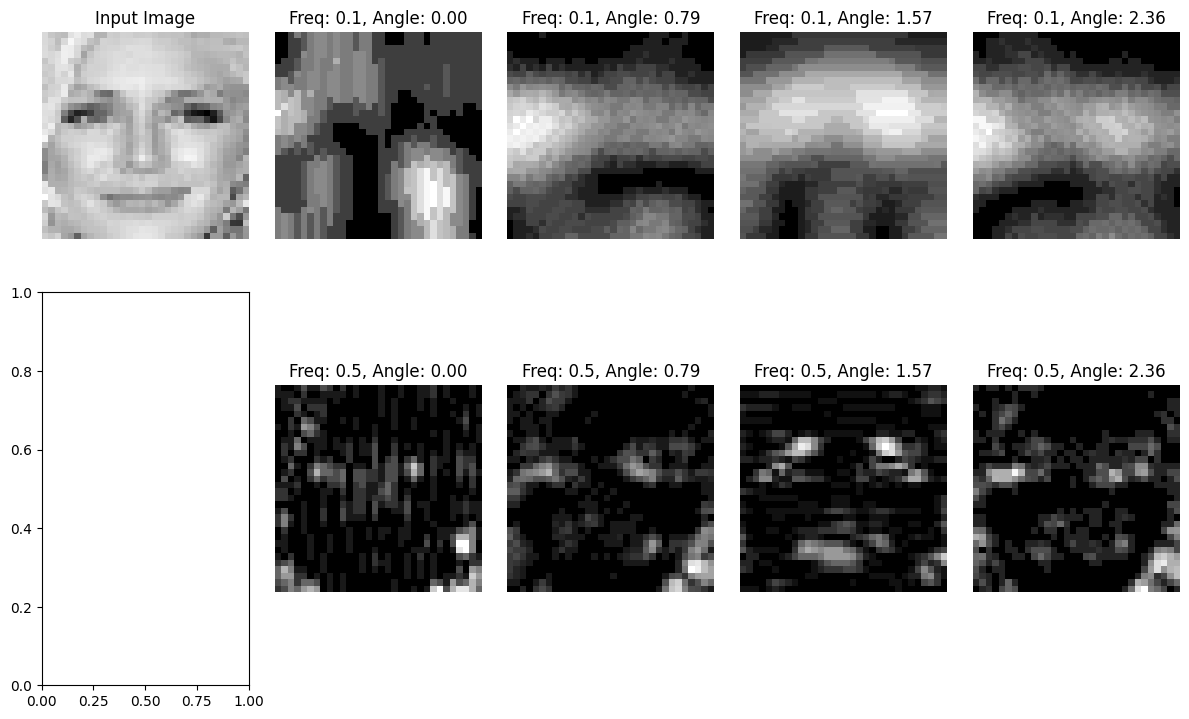

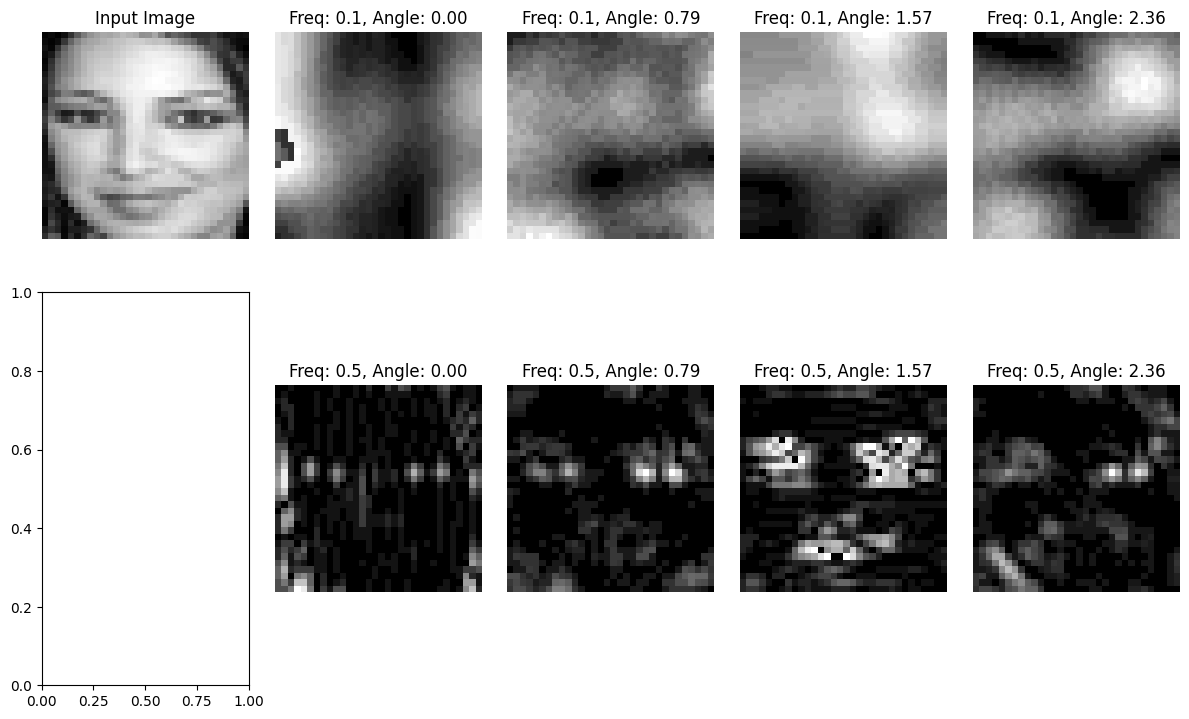

In [ ]:
from skimage.filters import gabor
import matplotlib.pyplot as plt
import numpy as np

# Function to compute Gabor features and visualize their effects
def compute_and_visualize_gabor(image):
    frequencies = [0.1, 0.5]  # Adjust frequencies as needed
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Adjust angles as needed

    fig, axes = plt.subplots(nrows=len(frequencies), ncols=len(angles) + 1, figsize=(12, 8))

    # Display the original image
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Input Image')
    axes[0, 0].axis('off')

    # Apply Gabor filters and visualize their effects
    for i, freq in enumerate(frequencies):
        for j, angle in enumerate(angles):
            filt_real, filt_imag = gabor(image, frequency=freq, theta=angle)
            gabor_energy = np.sqrt(filt_real**2 + filt_imag**2)

            axes[i, j+1].imshow(gabor_energy, cmap='gray')
            axes[i, j+1].set_title(f'Freq: {freq}, Angle: {angle:.2f}')
            axes[i, j+1].axis('off')

    plt.tight_layout()
    plt.show()

# Assuming you have a list of grayscale images named grayscale_images_male and grayscale_images_female with 5000 images each

# Visualize Gabor filter effects for the first five male images
print("Gabor Filter Effects for Male images:")
for i in range(5):
    compute_and_visualize_gabor(gray_male[i])

# Visualize Gabor filter effects for the first five female images
print("Gabor Filter Effects for Female images:")
for i in range(5):
    compute_and_visualize_gabor(gray_female[i])


In [ ]:
import pandas as pd

# Assuming you have all these feature lists already computed

# Creating DataFrames for each feature
lbp_male_df = pd.DataFrame(lbp_male_values, columns=[f"LBP_{i}" for i in range(len(lbp_male_values[0]))])
lbp_female_df = pd.DataFrame(lbp_female_values, columns=[f"LBP_{i}" for i in range(len(lbp_female_values[0]))])





In [ ]:
hog_male_df = pd.DataFrame(hog_male_features, columns=[f"HOG_{i}" for i in range(len(hog_male_features[0]))])
hog_female_df = pd.DataFrame(hog_female_features, columns=[f"HOG_{i}" for i in range(len(hog_female_features[0]))])


In [ ]:
# Adding Gender column
lbp_male_df['Gender'] = 0
lbp_female_df['Gender'] = 1





# Concatenating all the DataFrames
male_df = pd.concat([lbp_male_df, hog_male_df], axis=1)
female_df = pd.concat([lbp_female_df, hog_female_df], axis=1)


# Concatenating male and female DataFrames
all_data = pd.concat([male_df, female_df], ignore_index=True)

# Shuffle the data
all_data = all_data.sample(frac=1).reset_index(drop=True)
# Assuming the duplicate 'gender' columns are the first and second columns
all_data.drop(all_data.columns[1], axis=1, inplace=True)
all_data

,LBP_0,LBP_2,LBP_3,LBP_4,LBP_5,LBP_6,LBP_7,LBP_8,LBP_9,LBP_10,...,HOG_314,HOG_315,HOG_316,HOG_317,HOG_318,HOG_319,HOG_320,HOG_321,HOG_322,HOG_323
0,0.0,25.0,25.0,13.0,25.0,8.0,3.0,6.0,9.0,13.0,...,0.032349,0.174291,0.111197,0.313502,0.253556,0.213412,0.000000,0.083883,0.000000,0.000000
1,4.0,10.0,13.0,11.0,11.0,11.0,12.0,11.0,9.0,9.0,...,0.041771,0.350689,0.314003,0.350689,0.000000,0.192085,0.011204,0.007081,0.021608,0.054377
2,6.0,8.0,9.0,10.0,8.0,10.0,10.0,13.0,12.0,13.0,...,0.048805,0.286868,0.286868,0.286868,0.141694,0.152882,0.048069,0.023120,0.013167,0.063989
3,9.0,9.0,7.0,7.0,8.0,7.0,7.0,5.0,8.0,7.0,...,0.068325,0.183314,0.296602,0.296602,0.296602,0.210060,0.000000,0.010758,0.000000,0.024657
4,25.0,2.0,25.0,25.0,13.0,13.0,8.0,9.0,9.0,9.0,...,0.050362,0.326107,0.326107,0.326107,0.062648,0.112020,0.036928,0.003495,0.035765,0.063618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,7.0,6.0,8.0,10.0,12.0,1.0,0.0,11.0,12.0,13.0,...,0.067651,0.243755,0.089857,0.042853,0.073956,0.212773,0.045697,0.183346,0.124863,0.025643
2998,7.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,4.0,12.0,...,0.035877,0.293521,0.293521,0.097226,0.044723,0.276507,0.012648,0.129200,0.072661,0.094075
2999,25.0,10.0,13.0,10.0,10.0,11.0,13.0,7.0,9.0,9.0,...,0.049418,0.319210,0.319210,0.319210,0.162910,0.112428,0.034574,0.000000,0.029212,0.088373
3000,7.0,3.0,2.0,1.0,1.0,0.0,0.0,1.0,25.0,25.0,...,0.047255,0.203100,0.274234,0.274234,0.160565,0.235737,0.026386,0.000000,0.045451,0.059926


In [ ]:
## Let's start the modeling process

In [ ]:
## Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.preprocessing import StandardScaler




In [ ]:
# Extracting features (X) and labels (y)
X = all_data.drop('Gender', axis=1)  # Assuming 'Gender' is the label column
y = all_data['Gender']

# Displaying shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (3002, 1347)
Shape of y: (3002,)


In [ ]:
y

0       1
1       0
2       1
3       0
4       1
       ..
2997    0
2998    1
2999    0
3000    0
3001    1
Name: Gender, Length: 3002, dtype: int64

In [ ]:
## Normalizing the data just to see if any difference in accuracy
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Splitting the data into training and testing sets (assuming X and y are defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Initializing the SVM classifier
svm_classifier = SVC()



In [ ]:
# Fitting the model on the training data
svm_classifier.fit(X_train, y_train)



SVC()

In [ ]:
y_pred = svm_classifier.predict(X_test)



In [ ]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       305
           1       0.81      0.85      0.83       296

    accuracy                           0.83       601
   macro avg       0.83      0.83      0.83       601
weighted avg       0.83      0.83      0.83       601



In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split





# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8885191347753744


In [ ]:
import lightgbm as lgb

# Initialize LGBM classifier
lgb_model = lgb.LGBMClassifier()

# Train the LGBM model
lgb_model.fit(X_train, y_train)

# Predict labels for the test set using LGBM
y_pred_lgbm = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 1204, number of negative: 1197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 106810
[LightGBM] [Info] Number of data points in the train set: 2401, number of used features: 1347
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501458 -> initscore=0.005831
[LightGBM] [Info] Start training from score 0.005831


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_lgbm)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8951747088186356
